<a href="https://colab.research.google.com/github/jianning1/Capstone-Project/blob/master/Full_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Python Libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
import spacy 
import os
import sys
import numpy as np

nlp = spacy.load('en', disable=['ner', 'parser'])
import nltk
from nltk.stem.snowball import SnowballStemmer
from scipy import stats

from time import time
from collections import defaultdict
import gc
import io
import random

from __future__ import print_function, division
from builtins import range
import os
import sys
import numpy as np
import operator

import nltk
nltk.download('all')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize


import keras
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalAveragePooling1D, Dropout, Conv1D, GRU, Layer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam, SGD
from sklearn.metrics import roc_auc_score
import keras.backend as K
from keras.layers import CuDNNLSTM as LSTM
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras import metrics
from tensorflow.python.keras.metrics import Metric
from tensorflow.keras.utils import plot_model

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.utils import shuffle, class_weight

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# install tensorflow 2.0
!pip uninstall tensorflow
!pip install tensorflow-gpu==2.1.0

Uninstalling tensorflow-2.2.0rc2:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0rc2.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0rc2
     |████████████████████████████████| 421.8MB 35kB/s 
     |████████████████████████████████| 3.9MB 48.0MB/s 
     |████████████████████████████████| 450kB 55.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=ba255dd4cc866453419f4d3f8a744bbb1bf957fa52aa79b208aa1e91135744a5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorb

In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [3]:
# check the availability of GPU
%tensorflow_version 2.x
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


# Import and slice data

In [4]:
# Mount Google Drive (to save the downloaded files)
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
# read CSV file
mydata = pd.read_csv('/gdrive/My Drive/Full-Economic-News-DFE.csv', encoding = "ISO-8859-1")

In [6]:
data = mydata[['_unit_id','positivity', 'relevance', 'date','headline', 'text']]

data.head()

,_unit_id,positivity,relevance,date,headline,text
0,842613455,3.0,yes,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,842613456,NaN,no,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,842613457,NaN,no,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,842613458,NaN,no,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,842613459,3.0,yes,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


# Data Description

In [7]:
# distribution of news relevance
dist = data[['_unit_id','relevance']].groupby('relevance').count()
dist

,_unit_id
relevance,
no,6571
not sure,9
yes,1420


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


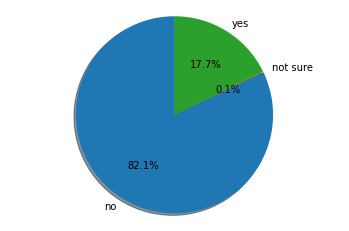

In [23]:
# pie chart of distribution of news relevance
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')    
plt.show()

In [24]:
# distribution of positivity of news that relevant to US economy
dist = data[data['positivity']!=0][['positivity','_unit_id']].groupby('positivity').count()
dist

,_unit_id
positivity,
2.0,35
3.0,343
4.0,255
5.0,205
6.0,214
7.0,295
8.0,71
9.0,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


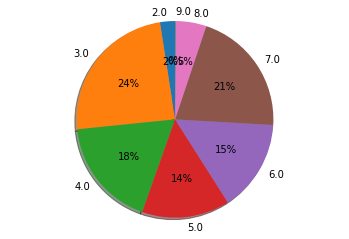

In [25]:
# pie chart of the distribution of positivity of US economy relevant news
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

# Pre-processing

## Check missing values

In [8]:
# no missing values in 'relevance'
sum(data['relevance'].isnull())

0

In [9]:
# no missing values in 'positivity'
sum(data[data['relevance']=='yes']['positivity'].isnull())

0

## Remove ambiguious data

In [0]:
# remove observations that are 'not sure' whether relevant to US economy
data = data[data.relevance != 'not sure']

# covert boolean type 'yes/no' to '1/0'
data.relevance = data.relevance.map(dict(yes=1, no=0))

# new feature 'texts' to include 'headline' and 'text' features
data['texts'] = data['headline'] + (' ') + data['text']

## Check Embeddings Coverage 
Self-defined funtion to check the proportion of words and texts covered by selected pre-trained word vectors

In [0]:
import operator

# split each sentences into a list of words
# return a dictionary of vocabulary with frequency 
def build_vocab(X):
    
    news = X.apply(lambda s: s.split()).values      
    vocab = {}
    
    for n in news:
        for word in n:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1                
    return vocab

# go through each word and check whether the word is in pre-trained word vectors
# return a list of uncovered vocabulary, unique words coverage and overall texts coverage.
def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage

### GloVe Pretrained Word Embedding loading

In [141]:
# Load GloVe Embeddings
print('Loading GloVe Embeddings.')

glove_embeddings = {}
f = open('/gdrive/My Drive/glove.42B.300d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

print('Found %s word vectors.' % len(glove_embeddings))


Loading GloVe Embeddings.
Found 1917495 word vectors.


### GloVe words and texts coverage

In [30]:
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

GloVe Embeddings cover 23.86% of vocabulary and 75.26% of text in texts


### Fasttext Pretrained Word Embedding loading

In [12]:
fin = io.open('/gdrive/My Drive/wiki-news-300d-1M-subword.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
n, d = map(int, fin.readline().split())
fasttext_embeddings = {}
for line in fin:
    tokens = line.rstrip().split(' ')
    fasttext_embeddings[tokens[0]] = map(float, tokens[1:])
fin.close()

print('Found %s word vectors.' % len(fasttext_embeddings))

Found 999994 word vectors.


### Fasttext words and texts coverage

In [32]:
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

Fasttext Embeddings cover 36.14% of vocabulary and 87.82% of text in texts


## Remove url and html

In [0]:
# function to remove url
def rm_url(contents):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',contents)

# function to remove html
def rm_html(contents):
    html=re.compile(r'<.*?>')
    return html.sub(r'',contents)

In [0]:
data['texts'] = data['texts'].apply(rm_url)
data['texts'] = data['texts'].apply(rm_html)

In [13]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 23.96% of vocabulary and 75.27% of text in texts
Fasttext Embeddings cover 36.70% of vocabulary and 88.01% of text in texts


In [14]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,Yields on CDs Fell in the Latest Week NEW YORK...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,The Morning Brief: White House Seeks to Limit ...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,Banking Bill Negotiators Set Compromise --- Pl...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,Manager's Journal: Sniffing Out Drug Abusers I...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,Currency Trading: Dollar Remains in Tight Rang...


## Remove non-alphabet characters and lower case

In [0]:
data['texts'] = [re.sub("[^A-Za-z ']+", ' ', str(line)).lower() for line in data['texts']]

In [16]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 83.24% of vocabulary and 98.70% of text in texts
Fasttext Embeddings cover 70.46% of vocabulary and 97.69% of text in texts


In [17]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yields on cds fell in the latest week new york...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,the morning brief white house seeks to limit ...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,banking bill negotiators set compromise plan...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,manager's journal sniffing out drug abusers i...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,currency trading dollar remains in tight rang...


In [18]:
# This is to delete variables and release memory if needed
 del fasttext_embeddings, texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage, texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage
 gc.collect()

11

## Lemmatization and Stopwords removal

In [19]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    txt = [token.lemma_ for token in doc if not token.is_stop]  
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

t = time()

data['texts'] = [cleaning(doc) for doc in nlp.pipe(data['texts'], batch_size=5000, n_threads=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 1.02 mins


In [47]:
# GloVe words and texts coverage check
texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts'], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts'], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 86.54% of vocabulary and 99.48% of text in texts
Fasttext Embeddings cover 69.39% of vocabulary and 98.02% of text in texts


In [48]:
data.head(5)

,_unit_id,positivity,relevance,date,headline,text,texts
0,842613455,3.0,1,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...,yield cd fall late week new york yield cert...
1,842613456,NaN,0,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...,morning brief white house seek limit child i...
2,842613457,NaN,0,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...,banking bill negotiator set compromise plan...
3,842613458,NaN,0,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...,manager journal sniff drug abuser quick fix ...
4,842613459,3.0,1,10/4/02,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...,currency trading dollar remain tight range a...


In [49]:
# This is to delete variables and release memory if needed
del fasttext_embeddings, texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage, texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage
gc.collect()

0

## Stemming

In [0]:
#from nltk.stem import PorterStemmer
#stemmer = PorterStemmer()

In [0]:
#from nltk.stem import SnowballStemmer
#stemmer = SnowballStemmer(language='english')

In [0]:
#data['texts1'] = [[stemmer.stem(x) for x in line.split()] for line in data['texts']]


In [53]:
#d = data['texts1']
#for i in range(len(d)):
#  d[d.index[i]]= ' '.join(d[d.index[i]])
#data['texts1'] = d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# GloVe words and texts coverage check
#texts_glove_oov, texts_glove_vocab_coverage, texts_glove_text_coverage = check_embeddings_coverage(data['texts1'], glove_embeddings)
#print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_glove_vocab_coverage, texts_glove_text_coverage))

# Fasttext words and texts coverage check
#texts_fasttext_oov, texts_fasttext_vocab_coverage, texts_fasttext_text_coverage = check_embeddings_coverage(data['texts1'], fasttext_embeddings)
#print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in texts'.format(texts_fasttext_vocab_coverage, texts_fasttext_text_coverage))

GloVe Embeddings cover 72.04% of vocabulary and 96.59% of text in texts
Fasttext Embeddings cover 47.32% of vocabulary and 83.12% of text in texts


Either run before or after lemmatization, vocabulary coverage dropped to 70%, therefore, do not include stemming

In [0]:
data = data[['_unit_id', 'positivity', 'relevance', 'date', 'texts']]

# Export Cleaned data

In [0]:
from google.colab import files
data.to_csv('/gdrive/My Drive/cleaned_data.csv') 

In [0]:
data = pd.read_csv('/gdrive/My Drive/cleaned_data.csv')

In [127]:
data.head(5)

,Unnamed: 0,_unit_id,positivity,relevance,date,texts
0,0,842613455,3.0,1,8/14/91,yield cd fall late week new york yield cert...
1,1,842613456,NaN,0,8/21/07,morning brief white house seek limit child i...
2,2,842613457,NaN,0,11/14/91,banking bill negotiator set compromise plan...
3,3,842613458,NaN,0,6/16/86,manager journal sniff drug abuser quick fix ...
4,4,842613459,3.0,1,10/4/02,currency trading dollar remain tight range a...


# Exploratory Data Analysis

##Length and word counts of texts

In [23]:
# length of headline and text for all news
texts_len_r = data['texts'].str.len()
# number of words in headline for irrelevant news
texts_word_counts_r = data['texts'].str.split().str.len()

print('Total texts has {} to {} characters, {} to {} words.'.format(texts_len_r.min(),
                                                                    texts_len_r.max(),
                                                                    texts_word_counts_r.min(),
                                                                    texts_word_counts_r.max()))

Total texts has 83 to 3379 characters, 10 to 432 words.


Text(0.5, 1.0, 'number of words in headline and text')

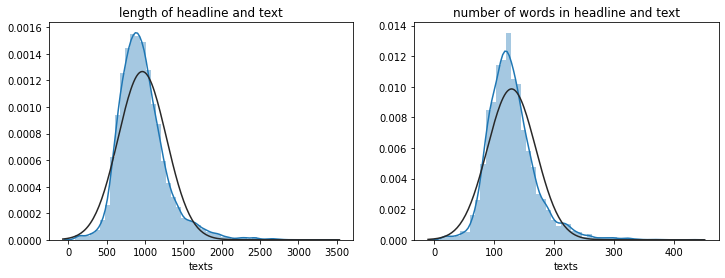

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.distplot(texts_len_r, ax = axes[0], fit=stats.norm, norm_hist=True)
axes[0].set_title('length of headline and text')

sns.distplot(texts_word_counts_r, ax = axes[1], fit=stats.norm, norm_hist=True)
axes[1].set_title('number of words in headline and text')

## Ngrams

In [0]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '']
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 10

#r = data # all data
#r = data[data['relevance']==1] # for text classification, relevant news
#r = data[data['relevance']==0] # for text classification, irrelevant news
r = data[data['positivity']==9] # for sentiment analysis, positivity = 2-9

# Unigrams
texts_unigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text):
        texts_unigrams[word] += 1
        
texts_unigrams = pd.DataFrame(sorted(texts_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
texts_bigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text, n_gram=2):
        texts_bigrams[word] += 1
        
texts_bigrams = pd.DataFrame(sorted(texts_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
texts_trigrams = defaultdict(int)

for text in r['texts']:
    for word in generate_ngrams(text, n_gram=3):
        texts_trigrams[word] += 1
        
texts_trigrams = pd.DataFrame(sorted(texts_trigrams.items(), key=lambda x: x[1])[::-1])

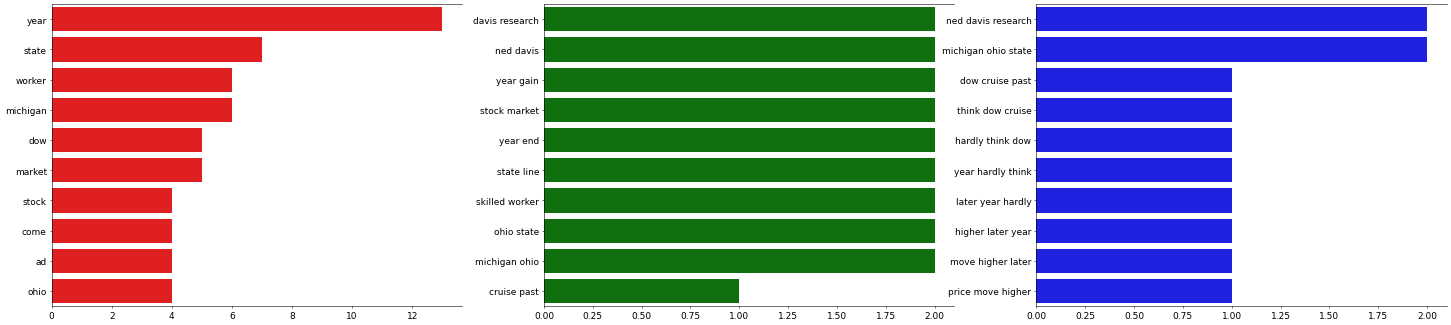

In [102]:
# Plot Ngrams
fig, axes = plt.subplots(ncols=3, figsize=(36, 8), dpi=50)

sns.barplot(y=texts_unigrams[0].values[:N], x=texts_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=texts_bigrams[0].values[:N], x=texts_bigrams[1].values[:N], ax=axes[1], color='green')
sns.barplot(y=texts_trigrams[0].values[:N], x=texts_trigrams[1].values[:N], ax=axes[2], color='blue')

for i in range(3):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

# Text Classification

In [0]:
data = data[['texts','relevance']]

## Oversampling
Oversampling the minority by looking for the synonyms of each word in minor class

In [0]:
# use WordNet to find synonyms of each word and oversample the minor class
from nltk.corpus import wordnet 

def get_synonyms(word):
	synonyms = set()
	for syn in wordnet.synsets(word): 
		for l in syn.lemmas(): 
			synonym = l.name()
			synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
			synonyms.add(synonym) 
	if word in synonyms:
		synonyms.remove(word)
	return list(synonyms)

In [0]:
# minor class data set
df = data[data['relevance']==1]

In [0]:
# function to oversample data
def oversample(wordlist): 
  new_words = wordlist
  for i in range(len(wordlist)):
    for random_word in wordlist[wordlist.index[i]]:
      try:
        synonyms = get_synonyms(random_word)  # find synonyms list of each word
        synonym = random.choice(list(synonyms))  # random select one sysnonym to replace the original word
        new_words[new_words.index[i]] = [synonym if word == random_word else word for word in new_words[new_words.index[i]]]
      except:
        pass
    s = ' '.join(new_words[new_words.index[i]]) # join the list of synonyms to a new sentence
    new_words[new_words.index[i]] = s
  augmented_sentences = pd.DataFrame(columns=['texts','relevance'])
  augmented_sentences['texts'] = new_words
  augmented_sentences['relevance']  = df['relevance']
  return augmented_sentences

In [0]:
# oversample the minor class data twice
sentence = df['texts']
word_list = sentence.str.split()
data_cleaned = data[['texts','relevance']]

random.seed(45)
data_cleaned = data_cleaned.append(oversample(word_list))

random.seed(98)
data_cleaned = data_cleaned.append(oversample(word_list))

In [148]:
dist = data_cleaned.groupby('relevance').count()
dist

,texts
relevance,
0,6571
1,4260


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


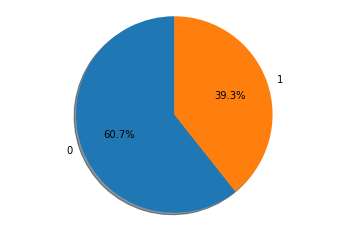

In [149]:

# pie chart of distribution of news relevance
fig1, ax1 = plt.subplots()
sizes = dist.values
label = dist.index.tolist()

ax1.pie(sizes, labels=label, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')    
plt.show()

In [0]:
# to ramdom shuffle data
data_cleaned = shuffle(data_cleaned)

In [0]:
# reset data index
data_cleaned = data_cleaned.reset_index()

In [152]:
data_cleaned.head(5)

,index,texts,relevance
0,1008,liothyronine uranium universalgasconstant grav...,1
1,5563,finance minister meet dollar fall group repr...,0
2,5472,fix rate annuity worth look igh stock price lo...,0
3,3521,jetblue get spirit ceragon netlist gain au...,0
4,132,deal deal maker archipelago set new stock...,0


## Baselines - SVM

In [0]:
from sklearn import metrics

texts = data_cleaned['texts'].values
labels = data_cleaned['relevance'].values

# Linear SVC Model:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# 9-split cross validatioon
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 7)

# perform matrix
cvscores_svm = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall'])

for train, test in kfold.split(texts, labels):
# Train both models on the moviereviews.tsv training set:
  text_clf_lsvc.fit(texts[train], labels[train])
  predictions_svm = text_clf_lsvc.predict(texts[test])
  cm_svm = metrics.confusion_matrix(labels[test], predictions_svm)
  cvscores_svm = cvscores_svm.append({'tp': cm_svm[1][1], 'fp': cm_svm[0][1], 'tn': cm_svm[0][0], 'fn': cm_svm[1][0], 
                                    'accuracy': (cm_svm[1][1]+cm_svm[0][0])/(cm_svm[0][0]+cm_svm[0][1]+(cm_svm[1][0]+cm_svm[1][1])),
                                    'precision': (cm_svm[1][1])/((cm_svm[0][1]+cm_svm[1][1])), 
                                    'recall': (cm_svm[1][1])/((cm_svm[1][1]+cm_svm[1][0])), 
                                    }, 
                                   ignore_index= True)

In [154]:
cvscores_svm.mean()

tp           312.400000
fp            43.800000
tn           613.300000
fn           113.600000
accuracy       0.854678
precision      0.877279
recall         0.733333
dtype: float64

## Bi-LSTM

In [0]:
# some configuration
MAX_SEQUENCE_LENGTH = 432   # max sentence length 432 words
EMBEDDING_DIM = 300    # word vector dimension


### Word Embedding Weights

In [156]:
# load in pre-trained word vectors
# shape: MAX_VOCAB_SIZE x word vector dimension
MAX_VOCAB_SIZE = 50000     # how many words will be used from dictionary 

print('Loading word vectors...')
word2vec = glove_embeddings

# load dataset
sentences = data_cleaned['texts'].fillna("DUMMY_VALUE").values

# convert the sentences (strings) into integers
# return a list of the index of every word in every sentence
num_words = MAX_VOCAB_SIZE
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(sentences)   # word counts on unique words, see below

# word2idx: number of unique words with index (Dictionary of word index)
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Loading word vectors...
Found 42941 unique tokens.


In [157]:
# prepare embedding matrix
# use the word and index in word2idx to look for the word vector (numeric)
# embedding_matrix
# size: # of unique words x D
n = 0
uncovered_words = {}
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE,len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        #print(embedding_vector)
        if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector
        else:
            n = n + 1
            uncovered_words[n] = word
print('{}, or {:.2%} of total {} unique words are not covered'.format(n, n/len(word2idx), len(word2idx)))

Filling pre-trained embeddings...
8471, or 19.73% of total 42941 unique words are not covered


### Padding

In [158]:
sequences = tokenizer.texts_to_sequences(data_cleaned['texts'].values)
texts = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', texts.shape)

Shape of test data tensor: (10831, 432)


### Model

#### Learning rate 0.001

##### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 16s 2ms/sample - loss: 0.3787 - tp: 2137.0000 - fp: 57.0000 - tn: 5201.0000 - fn: 1269.0000 - accuracy: 0.8470 - precision: 0.9740 - recall: 0.6274 - auc: 0.8599 - val_loss: 0.2875 - val_tp: 270.0000 - val_fp: 0.0000e+00 - val_tn: 583.0000 - val_fn: 110.0000 - val_accuracy: 0.8858 - val_precision: 1.0000 - val_recall: 0.7105 - val_auc: 0.9198
Epoch 2/100
8664/8664 [==============================] - 9s 1ms/sample - loss: 0.3136 - tp: 2257.0000 - fp: 5.0000 - tn: 5253.0000 - fn: 1149.0000 - accuracy: 0.8668 - precision: 0.9978 - recall: 0.6627 - auc: 0.9085 - val_loss: 0.2802 - val_tp: 270.0000 - val_fp: 0.0000e+00 - val_tn: 583.0000 - val_fn: 110.0000 - val_accuracy: 0.8858 - val_precision: 1.0000 - val_recall: 0.7105 - val_auc: 0.9256
Epoch 3/100
8664/8664 [==============================] - 9s 1ms/sample - loss: 0.3099 - tp: 2264.0000 - fp:

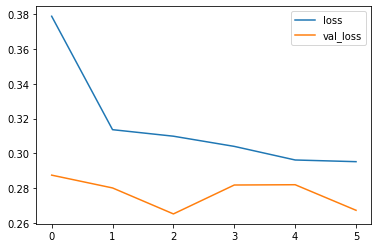

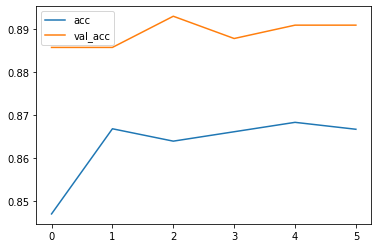

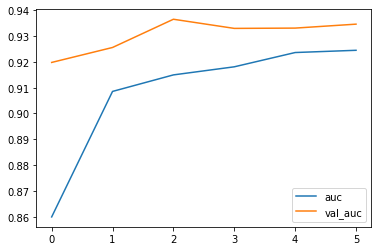

1204/1204 [==============================] - 1s 551us/sample - loss: 0.3329 - tp: 301.0000 - fp: 0.0000e+00 - tn: 730.0000 - fn: 173.0000 - accuracy: 0.8563 - precision: 1.0000 - recall: 0.6350 - auc: 0.8995
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 14s 2ms/sample - loss: 0.3828 - tp: 2109.0000 - fp: 36.0000 - tn: 5217.0000 - fn: 1302.0000 - accuracy: 0.8456 - precision: 0.9832 - recall: 0.6183 - auc: 0.8599 - val_loss: 0.2903 - val_tp: 262.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 113.0000 - val_accuracy: 0.8827 - val_precision: 1.0000 - val_recall: 0.6987 - val_auc: 0.9212
Epoch 2/100
8664/8664 [==============================] - 9s 1ms/sample - loss: 0.3127 - tp: 2272.0000 - fp: 7.0000 - tn: 5246.0000 - fn: 1139.0000 - accuracy: 0.8677 - precision: 0.9969 - recall: 0.6661 - auc: 0.9083 - val_loss: 0.2867 - val_tp: 261.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 114.0000 - val_accur

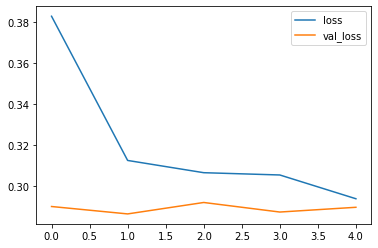

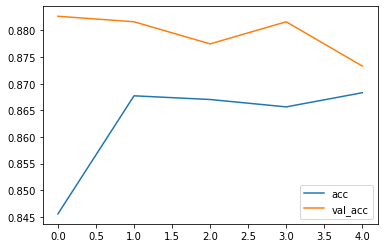

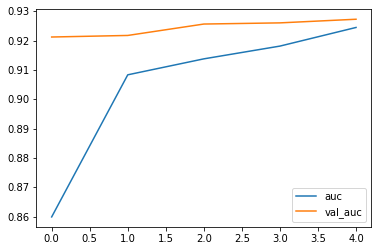

1204/1204 [==============================] - 1s 560us/sample - loss: 0.3204 - tp: 310.0000 - fp: 0.0000e+00 - tn: 730.0000 - fn: 164.0000 - accuracy: 0.8638 - precision: 1.0000 - recall: 0.6540 - auc: 0.9103
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 13s 2ms/sample - loss: 0.3799 - tp: 2100.0000 - fp: 79.0000 - tn: 5176.0000 - fn: 1309.0000 - accuracy: 0.8398 - precision: 0.9637 - recall: 0.6160 - auc: 0.8731 - val_loss: 0.3283 - val_tp: 266.0000 - val_fp: 10.0000 - val_tn: 576.0000 - val_fn: 111.0000 - val_accuracy: 0.8744 - val_precision: 0.9638 - val_recall: 0.7056 - val_auc: 0.9189
Epoch 2/100
8664/8664 [==============================] - 10s 1ms/sample - loss: 0.3169 - tp: 2288.0000 - fp: 56.0000 - tn: 5199.0000 - fn: 1121.0000 - accuracy: 0.8642 - precision: 0.9761 - recall: 0.6712 - auc: 0.9091 - val_loss: 0.2928 - val_tp: 269.0000 - val_fp: 10.0000 - val_tn: 576.0000 - val_fn: 108.0000 - val_accuracy:

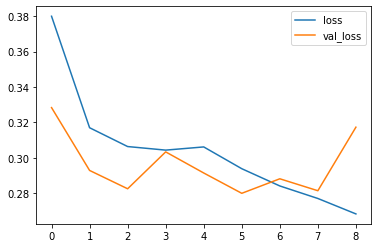

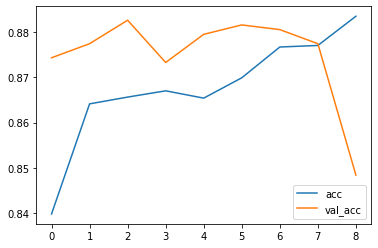

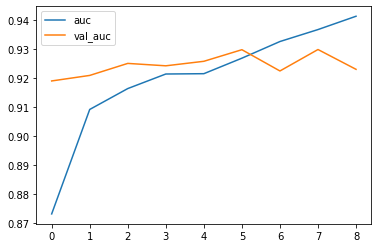

1204/1204 [==============================] - 1s 537us/sample - loss: 0.2876 - tp: 333.0000 - fp: 10.0000 - tn: 720.0000 - fn: 141.0000 - accuracy: 0.8746 - precision: 0.9708 - recall: 0.7025 - auc: 0.9273
Training model...
Train on 8664 samples, validate on 963 samples
Epoch 1/100
8664/8664 [==============================] - 14s 2ms/sample - loss: 0.3742 - tp: 2121.0000 - fp: 66.0000 - tn: 5184.0000 - fn: 1293.0000 - accuracy: 0.8431 - precision: 0.9698 - recall: 0.6213 - auc: 0.8691 - val_loss: 0.2999 - val_tp: 264.0000 - val_fp: 1.0000 - val_tn: 589.0000 - val_fn: 109.0000 - val_accuracy: 0.8858 - val_precision: 0.9962 - val_recall: 0.7078 - val_auc: 0.9191
Epoch 2/100
8664/8664 [==============================] - 9s 1ms/sample - loss: 0.3137 - tp: 2277.0000 - fp: 18.0000 - tn: 5232.0000 - fn: 1137.0000 - accuracy: 0.8667 - precision: 0.9922 - recall: 0.6670 - auc: 0.9090 - val_loss: 0.2879 - val_tp: 264.0000 - val_fp: 0.0000e+00 - val_tn: 590.0000 - val_fn: 109.0000 - val_accuracy: 0

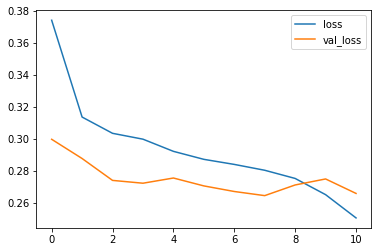

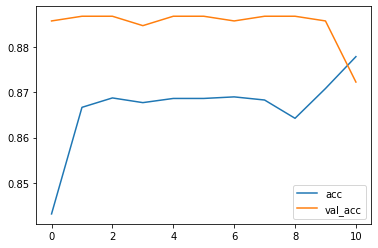

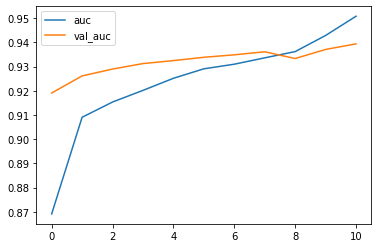

1204/1204 [==============================] - 1s 547us/sample - loss: 0.3247 - tp: 297.0000 - fp: 1.0000 - tn: 730.0000 - fn: 176.0000 - accuracy: 0.8530 - precision: 0.9966 - recall: 0.6279 - auc: 0.9112
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 13s 1ms/sample - loss: 0.3760 - tp: 2096.0000 - fp: 23.0000 - tn: 5225.0000 - fn: 1321.0000 - accuracy: 0.8449 - precision: 0.9891 - recall: 0.6134 - auc: 0.8686 - val_loss: 0.2849 - val_tp: 265.0000 - val_fp: 2.0000 - val_tn: 591.0000 - val_fn: 105.0000 - val_accuracy: 0.8889 - val_precision: 0.9925 - val_recall: 0.7162 - val_auc: 0.9266
Epoch 2/100
8665/8665 [==============================] - 9s 1ms/sample - loss: 0.3192 - tp: 2236.0000 - fp: 24.0000 - tn: 5224.0000 - fn: 1181.0000 - accuracy: 0.8609 - precision: 0.9894 - recall: 0.6544 - auc: 0.9067 - val_loss: 0.2724 - val_tp: 263.0000 - val_fp: 1.0000 - val_tn: 592.0000 - val_fn: 107.0000 - val_accuracy: 0.8879

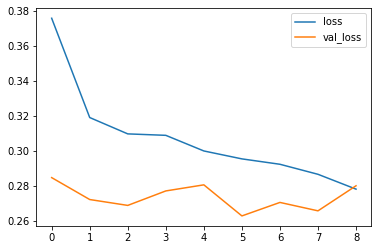

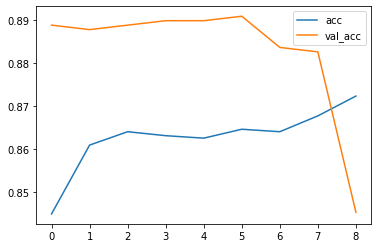

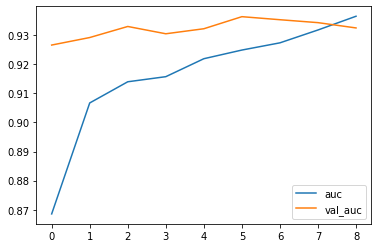

1203/1203 [==============================] - 1s 551us/sample - loss: 0.2831 - tp: 335.0000 - fp: 0.0000e+00 - tn: 730.0000 - fn: 138.0000 - accuracy: 0.8853 - precision: 1.0000 - recall: 0.7082 - auc: 0.9246
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 13s 1ms/sample - loss: 0.3721 - tp: 2073.0000 - fp: 27.0000 - tn: 5226.0000 - fn: 1339.0000 - accuracy: 0.8424 - precision: 0.9871 - recall: 0.6076 - auc: 0.8758 - val_loss: 0.2825 - val_tp: 266.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 109.0000 - val_accuracy: 0.8868 - val_precision: 1.0000 - val_recall: 0.7093 - val_auc: 0.9248
Epoch 2/100
8665/8665 [==============================] - 9s 1ms/sample - loss: 0.3181 - tp: 2232.0000 - fp: 22.0000 - tn: 5231.0000 - fn: 1180.0000 - accuracy: 0.8613 - precision: 0.9902 - recall: 0.6542 - auc: 0.9092 - val_loss: 0.2753 - val_tp: 267.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 108.0000 - val_accu

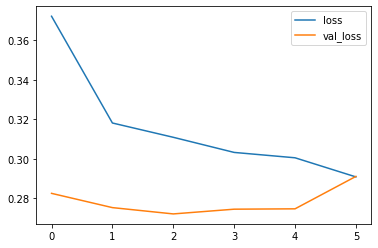

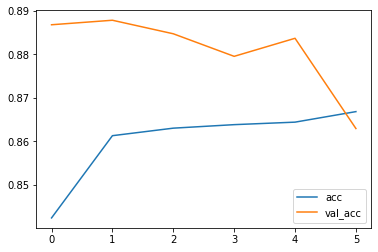

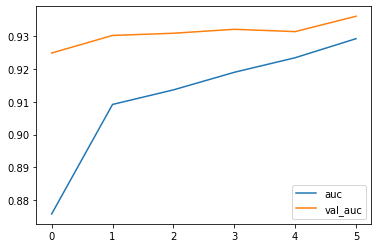

1203/1203 [==============================] - 1s 548us/sample - loss: 0.2588 - tp: 347.0000 - fp: 1.0000 - tn: 729.0000 - fn: 126.0000 - accuracy: 0.8944 - precision: 0.9971 - recall: 0.7336 - auc: 0.9406
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 13s 1ms/sample - loss: 0.3759 - tp: 2154.0000 - fp: 56.0000 - tn: 5195.0000 - fn: 1260.0000 - accuracy: 0.8481 - precision: 0.9747 - recall: 0.6309 - auc: 0.8623 - val_loss: 0.2998 - val_tp: 267.0000 - val_fp: 0.0000e+00 - val_tn: 590.0000 - val_fn: 106.0000 - val_accuracy: 0.8899 - val_precision: 1.0000 - val_recall: 0.7158 - val_auc: 0.9159
Epoch 2/100
8665/8665 [==============================] - 9s 1ms/sample - loss: 0.3185 - tp: 2265.0000 - fp: 6.0000 - tn: 5245.0000 - fn: 1149.0000 - accuracy: 0.8667 - precision: 0.9974 - recall: 0.6634 - auc: 0.9036 - val_loss: 0.2803 - val_tp: 267.0000 - val_fp: 0.0000e+00 - val_tn: 590.0000 - val_fn: 106.0000 - val_accuracy:

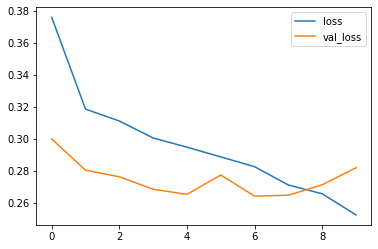

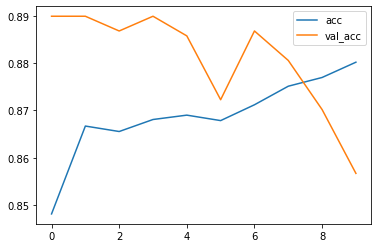

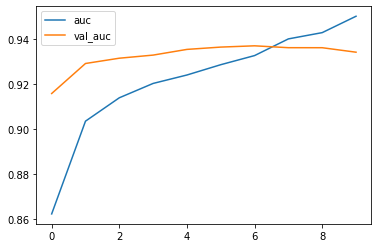

1203/1203 [==============================] - 1s 550us/sample - loss: 0.3201 - tp: 300.0000 - fp: 1.0000 - tn: 729.0000 - fn: 173.0000 - accuracy: 0.8554 - precision: 0.9967 - recall: 0.6342 - auc: 0.9167
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 15s 2ms/sample - loss: 0.3841 - tp: 2105.0000 - fp: 71.0000 - tn: 5182.0000 - fn: 1307.0000 - accuracy: 0.8410 - precision: 0.9674 - recall: 0.6169 - auc: 0.8563 - val_loss: 0.2937 - val_tp: 268.0000 - val_fp: 1.0000 - val_tn: 587.0000 - val_fn: 107.0000 - val_accuracy: 0.8879 - val_precision: 0.9963 - val_recall: 0.7147 - val_auc: 0.9223
Epoch 2/100
8665/8665 [==============================] - 9s 1ms/sample - loss: 0.3195 - tp: 2251.0000 - fp: 13.0000 - tn: 5240.0000 - fn: 1161.0000 - accuracy: 0.8645 - precision: 0.9943 - recall: 0.6597 - auc: 0.9052 - val_loss: 0.2821 - val_tp: 271.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 104.0000 - val_accuracy: 0.

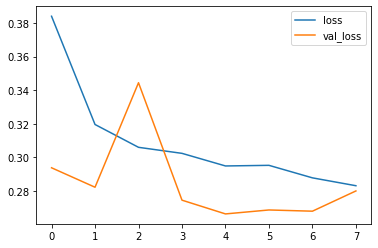

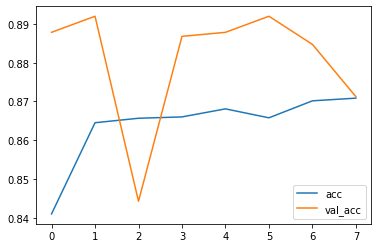

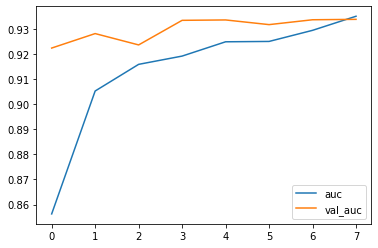

1203/1203 [==============================] - 1s 541us/sample - loss: 0.3193 - tp: 326.0000 - fp: 12.0000 - tn: 718.0000 - fn: 147.0000 - accuracy: 0.8678 - precision: 0.9645 - recall: 0.6892 - auc: 0.9083
Training model...
Train on 8665 samples, validate on 963 samples
Epoch 1/100
8665/8665 [==============================] - 14s 2ms/sample - loss: 0.3747 - tp: 2095.0000 - fp: 28.0000 - tn: 5234.0000 - fn: 1308.0000 - accuracy: 0.8458 - precision: 0.9868 - recall: 0.6156 - auc: 0.8713 - val_loss: 0.3187 - val_tp: 285.0000 - val_fp: 26.0000 - val_tn: 553.0000 - val_fn: 99.0000 - val_accuracy: 0.8702 - val_precision: 0.9164 - val_recall: 0.7422 - val_auc: 0.9240
Epoch 2/100
8665/8665 [==============================] - 9s 1ms/sample - loss: 0.3114 - tp: 2259.0000 - fp: 11.0000 - tn: 5251.0000 - fn: 1144.0000 - accuracy: 0.8667 - precision: 0.9952 - recall: 0.6638 - auc: 0.9100 - val_loss: 0.2773 - val_tp: 277.0000 - val_fp: 0.0000e+00 - val_tn: 579.0000 - val_fn: 107.0000 - val_accuracy: 0

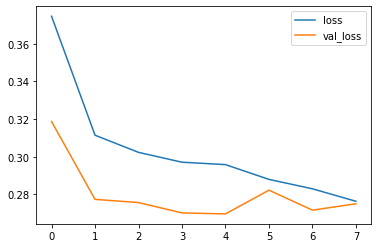

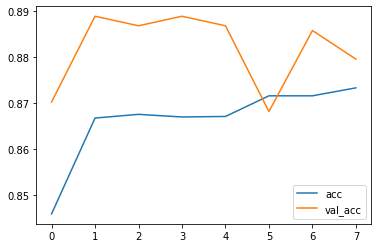

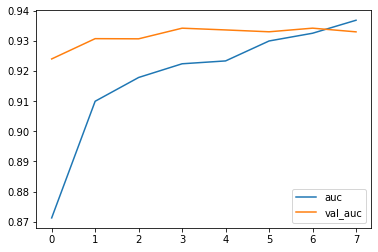

1203/1203 [==============================] - 1s 559us/sample - loss: 0.3212 - tp: 320.0000 - fp: 16.0000 - tn: 714.0000 - fn: 153.0000 - accuracy: 0.8595 - precision: 0.9524 - recall: 0.6765 - auc: 0.9066


In [159]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 100   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 9

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
#  mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)
# fit model
# load a saved model

#  from sklearn.utils import class_weight

  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    #class_weight = class_weight_dict
    #use_multiprocessing=True
  )

#  saved_model = tf.keras.models.load_model('best_model.h5')
#  saved_model.summary()

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  #scores = saved_model.evaluate(x = texts[test], y = labels[test])
  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores = cvscores.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [25]:
pip install graphviz

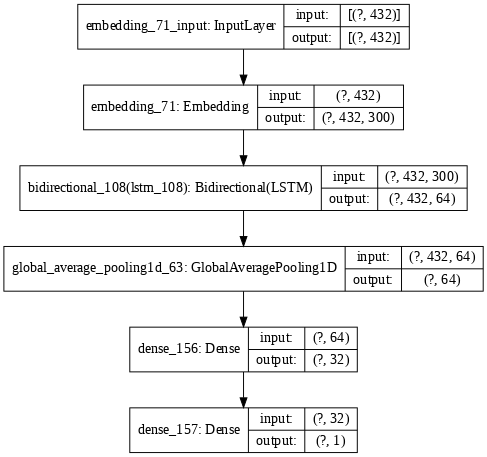

In [160]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi = 70)

In [161]:
cvscores

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,301.0,0.0,730.0,173.0,0.856312,1.000000,0.635021,0.899477
1,310.0,0.0,730.0,164.0,0.863787,1.000000,0.654008,0.910325
2,333.0,10.0,720.0,141.0,0.874585,0.970845,0.702532,0.927256
3,297.0,1.0,730.0,176.0,0.852990,0.996644,0.627907,0.911247
4,335.0,0.0,730.0,138.0,0.885287,1.000000,0.708245,0.924595
5,347.0,1.0,729.0,126.0,0.894431,0.997126,0.733615,0.940602
6,300.0,1.0,729.0,173.0,0.855362,0.996678,0.634249,0.916680
7,326.0,12.0,718.0,147.0,0.867830,0.964497,0.689218,0.908315
8,320.0,16.0,714.0,153.0,0.859518,0.952381,0.676533,0.906615


In [162]:
cvscores.mean(axis = 0)

tp           318.777778
fp             4.555556
tn           725.555556
fn           154.555556
accuracy       0.867789
precision      0.986464
recall         0.673481
auc            0.916123
dtype: float64

#### Learning rate 0.0001

##### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 13s 2ms/sample - loss: 0.5304 - tp: 1517.0000 - fp: 68.0000 - tn: 5252.0000 - fn: 1935.0000 - accuracy: 0.7717 - precision: 0.9571 - recall: 0.4395 - auc: 0.8004 - val_loss: 0.3390 - val_tp: 278.0000 - val_fp: 7.0000 - val_tn: 586.0000 - val_fn: 104.0000 - val_accuracy: 0.8862 - val_precision: 0.9754 - val_recall: 0.7277 - val_auc: 0.8751
Epoch 2/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.3606 - tp: 2277.0000 - fp: 19.0000 - tn: 5301.0000 - fn: 1175.0000 - accuracy: 0.8639 - precision: 0.9917 - recall: 0.6596 - auc: 0.8453 - val_loss: 0.3117 - val_tp: 278.0000 - val_fp: 4.0000 - val_tn: 589.0000 - val_fn: 104.0000 - val_accuracy: 0.8892 - val_precision: 0.9858 - val_recall: 0.7277 - val_auc: 0.8927
Epoch 3/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.3398 - tp: 2284.0000 - fp: 6

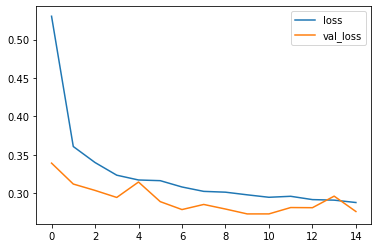

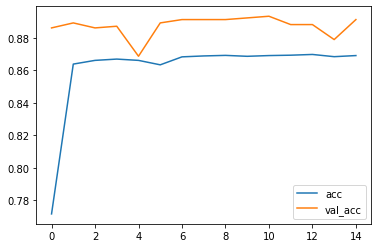

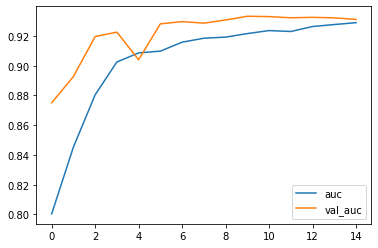

1084/1084 [==============================] - 1s 548us/sample - loss: 0.3464 - tp: 265.0000 - fp: 3.0000 - tn: 655.0000 - fn: 161.0000 - accuracy: 0.8487 - precision: 0.9888 - recall: 0.6221 - auc: 0.8936
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5581 - tp: 1302.0000 - fp: 133.0000 - tn: 5190.0000 - fn: 2148.0000 - accuracy: 0.7400 - precision: 0.9073 - recall: 0.3774 - auc: 0.7803 - val_loss: 0.4191 - val_tp: 260.0000 - val_fp: 1.0000 - val_tn: 590.0000 - val_fn: 124.0000 - val_accuracy: 0.8718 - val_precision: 0.9962 - val_recall: 0.6771 - val_auc: 0.8688
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3794 - tp: 2273.0000 - fp: 36.0000 - tn: 5287.0000 - fn: 1177.0000 - accuracy: 0.8617 - precision: 0.9844 - recall: 0.6588 - auc: 0.8453 - val_loss: 0.3240 - val_tp: 266.0000 - val_fp: 0.0000e+00 - val_tn: 591.0000 - val_fn: 118.0000 - val_accuracy

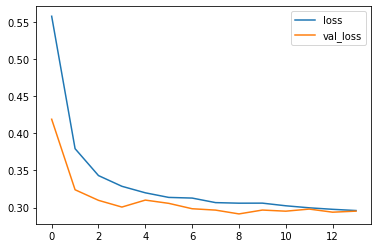

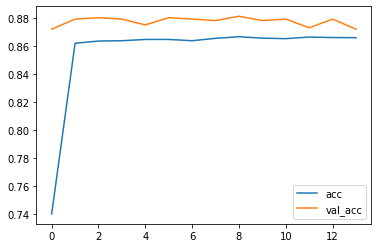

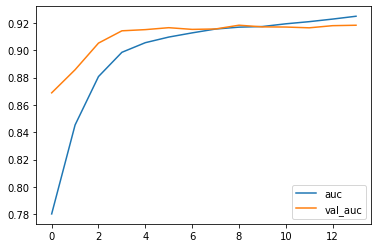

1083/1083 [==============================] - 1s 546us/sample - loss: 0.3112 - tp: 286.0000 - fp: 3.0000 - tn: 654.0000 - fn: 140.0000 - accuracy: 0.8680 - precision: 0.9896 - recall: 0.6714 - auc: 0.9078
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 1ms/sample - loss: 0.5441 - tp: 1308.0000 - fp: 6.0000 - tn: 5315.0000 - fn: 2144.0000 - accuracy: 0.7549 - precision: 0.9954 - recall: 0.3789 - auc: 0.7935 - val_loss: 0.4121 - val_tp: 261.0000 - val_fp: 1.0000 - val_tn: 592.0000 - val_fn: 121.0000 - val_accuracy: 0.8749 - val_precision: 0.9962 - val_recall: 0.6832 - val_auc: 0.8645
Epoch 2/1000
8773/8773 [==============================] - 9s 1ms/sample - loss: 0.3882 - tp: 2306.0000 - fp: 94.0000 - tn: 5227.0000 - fn: 1146.0000 - accuracy: 0.8587 - precision: 0.9608 - recall: 0.6680 - auc: 0.8584 - val_loss: 0.3296 - val_tp: 269.0000 - val_fp: 12.0000 - val_tn: 581.0000 - val_fn: 113.0000 - val_accuracy: 0.87

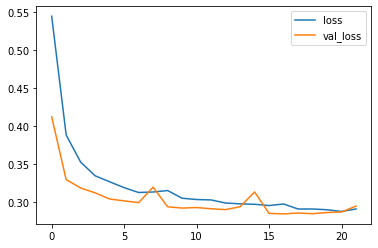

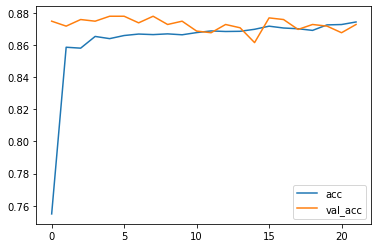

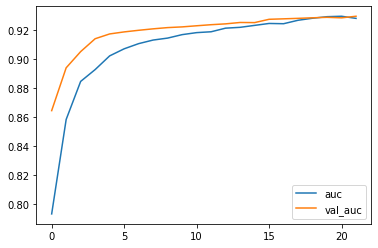

1083/1083 [==============================] - 1s 540us/sample - loss: 0.2817 - tp: 301.0000 - fp: 8.0000 - tn: 649.0000 - fn: 125.0000 - accuracy: 0.8772 - precision: 0.9741 - recall: 0.7066 - auc: 0.9304
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 1ms/sample - loss: 0.5538 - tp: 1491.0000 - fp: 427.0000 - tn: 4894.0000 - fn: 1961.0000 - accuracy: 0.7278 - precision: 0.7774 - recall: 0.4319 - auc: 0.7739 - val_loss: 0.3539 - val_tp: 268.0000 - val_fp: 4.0000 - val_tn: 589.0000 - val_fn: 114.0000 - val_accuracy: 0.8790 - val_precision: 0.9853 - val_recall: 0.7016 - val_auc: 0.8703
Epoch 2/1000
8773/8773 [==============================] - 9s 1ms/sample - loss: 0.3738 - tp: 2276.0000 - fp: 67.0000 - tn: 5254.0000 - fn: 1176.0000 - accuracy: 0.8583 - precision: 0.9714 - recall: 0.6593 - auc: 0.8413 - val_loss: 0.3403 - val_tp: 274.0000 - val_fp: 13.0000 - val_tn: 580.0000 - val_fn: 108.0000 - val_accuracy: 0.

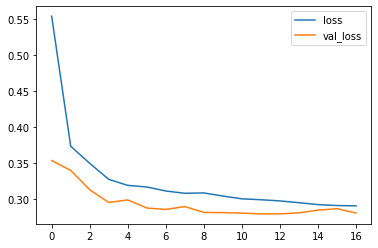

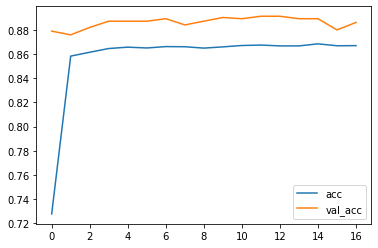

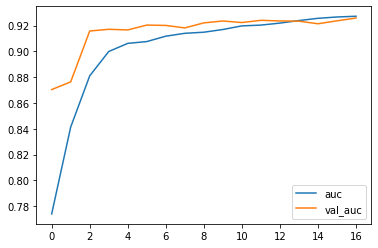

1083/1083 [==============================] - 1s 542us/sample - loss: 0.3261 - tp: 277.0000 - fp: 3.0000 - tn: 654.0000 - fn: 149.0000 - accuracy: 0.8596 - precision: 0.9893 - recall: 0.6502 - auc: 0.9047
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5501 - tp: 1444.0000 - fp: 189.0000 - tn: 5126.0000 - fn: 2014.0000 - accuracy: 0.7489 - precision: 0.8843 - recall: 0.4176 - auc: 0.7836 - val_loss: 0.3551 - val_tp: 265.0000 - val_fp: 3.0000 - val_tn: 596.0000 - val_fn: 111.0000 - val_accuracy: 0.8831 - val_precision: 0.9888 - val_recall: 0.7048 - val_auc: 0.8712
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3652 - tp: 2257.0000 - fp: 23.0000 - tn: 5292.0000 - fn: 1201.0000 - accuracy: 0.8605 - precision: 0.9899 - recall: 0.6527 - auc: 0.8525 - val_loss: 0.3185 - val_tp: 261.0000 - val_fp: 0.0000e+00 - val_tn: 599.0000 - val_fn: 115.0000 - val_accuracy

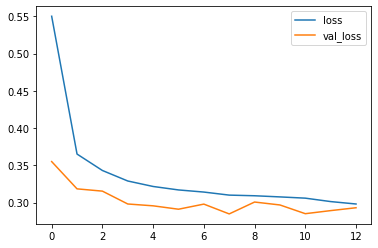

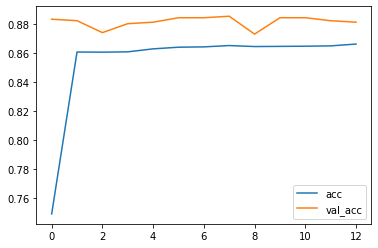

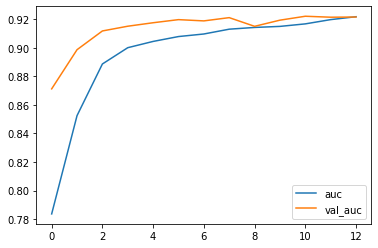

1083/1083 [==============================] - 1s 575us/sample - loss: 0.3162 - tp: 283.0000 - fp: 0.0000e+00 - tn: 657.0000 - fn: 143.0000 - accuracy: 0.8680 - precision: 1.0000 - recall: 0.6643 - auc: 0.9054
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5612 - tp: 1299.0000 - fp: 15.0000 - tn: 5297.0000 - fn: 2162.0000 - accuracy: 0.7519 - precision: 0.9886 - recall: 0.3753 - auc: 0.7864 - val_loss: 0.3959 - val_tp: 266.0000 - val_fp: 3.0000 - val_tn: 599.0000 - val_fn: 107.0000 - val_accuracy: 0.8872 - val_precision: 0.9888 - val_recall: 0.7131 - val_auc: 0.8690
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3742 - tp: 2248.0000 - fp: 25.0000 - tn: 5287.0000 - fn: 1213.0000 - accuracy: 0.8589 - precision: 0.9890 - recall: 0.6495 - auc: 0.8379 - val_loss: 0.3170 - val_tp: 264.0000 - val_fp: 1.0000 - val_tn: 601.0000 - val_fn: 109.0000 - val_accuracy:

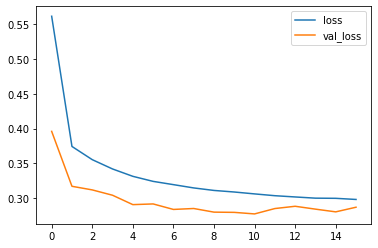

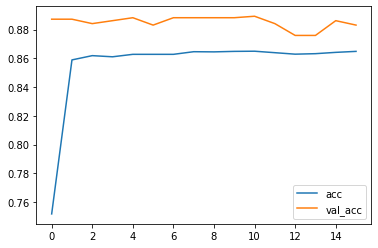

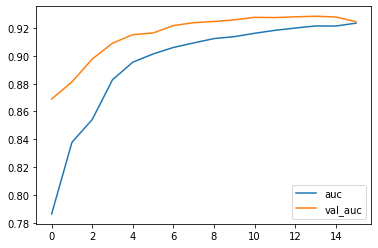

1083/1083 [==============================] - 1s 578us/sample - loss: 0.2781 - tp: 303.0000 - fp: 3.0000 - tn: 654.0000 - fn: 123.0000 - accuracy: 0.8837 - precision: 0.9902 - recall: 0.7113 - auc: 0.9260
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5428 - tp: 1422.0000 - fp: 59.0000 - tn: 5257.0000 - fn: 2035.0000 - accuracy: 0.7613 - precision: 0.9602 - recall: 0.4113 - auc: 0.7964 - val_loss: 0.3816 - val_tp: 271.0000 - val_fp: 2.0000 - val_tn: 596.0000 - val_fn: 106.0000 - val_accuracy: 0.8892 - val_precision: 0.9927 - val_recall: 0.7188 - val_auc: 0.8770
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3757 - tp: 2254.0000 - fp: 32.0000 - tn: 5284.0000 - fn: 1203.0000 - accuracy: 0.8592 - precision: 0.9860 - recall: 0.6520 - auc: 0.8466 - val_loss: 0.3168 - val_tp: 270.0000 - val_fp: 0.0000e+00 - val_tn: 598.0000 - val_fn: 107.0000 - val_accuracy:

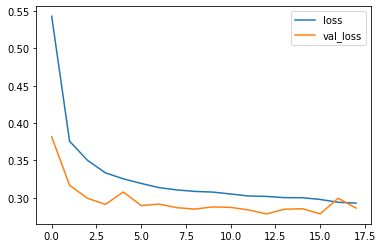

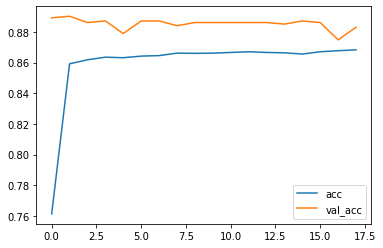

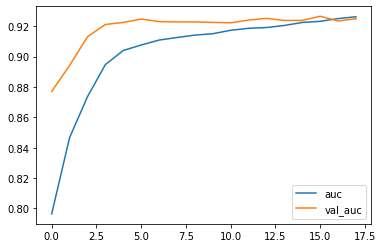

1083/1083 [==============================] - 1s 548us/sample - loss: 0.2834 - tp: 293.0000 - fp: 2.0000 - tn: 655.0000 - fn: 133.0000 - accuracy: 0.8753 - precision: 0.9932 - recall: 0.6878 - auc: 0.9303
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 1ms/sample - loss: 0.5608 - tp: 1410.0000 - fp: 291.0000 - tn: 5029.0000 - fn: 2043.0000 - accuracy: 0.7340 - precision: 0.8289 - recall: 0.4083 - auc: 0.7711 - val_loss: 0.3725 - val_tp: 276.0000 - val_fp: 3.0000 - val_tn: 591.0000 - val_fn: 105.0000 - val_accuracy: 0.8892 - val_precision: 0.9892 - val_recall: 0.7244 - val_auc: 0.8809
Epoch 2/1000
8773/8773 [==============================] - 9s 1ms/sample - loss: 0.3759 - tp: 2266.0000 - fp: 28.0000 - tn: 5292.0000 - fn: 1187.0000 - accuracy: 0.8615 - precision: 0.9878 - recall: 0.6562 - auc: 0.8373 - val_loss: 0.3098 - val_tp: 275.0000 - val_fp: 1.0000 - val_tn: 593.0000 - val_fn: 106.0000 - val_accuracy: 0.8

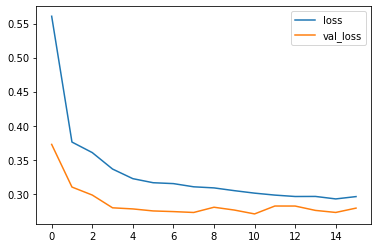

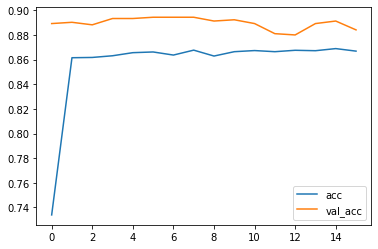

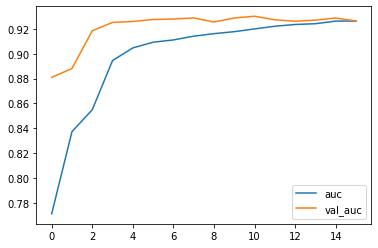

1083/1083 [==============================] - 1s 596us/sample - loss: 0.3176 - tp: 278.0000 - fp: 7.0000 - tn: 650.0000 - fn: 148.0000 - accuracy: 0.8569 - precision: 0.9754 - recall: 0.6526 - auc: 0.9129
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5295 - tp: 1518.0000 - fp: 136.0000 - tn: 5182.0000 - fn: 1937.0000 - accuracy: 0.7637 - precision: 0.9178 - recall: 0.4394 - auc: 0.7959 - val_loss: 0.3686 - val_tp: 271.0000 - val_fp: 0.0000e+00 - val_tn: 596.0000 - val_fn: 108.0000 - val_accuracy: 0.8892 - val_precision: 1.0000 - val_recall: 0.7150 - val_auc: 0.8857
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3572 - tp: 2244.0000 - fp: 25.0000 - tn: 5293.0000 - fn: 1211.0000 - accuracy: 0.8591 - precision: 0.9890 - recall: 0.6495 - auc: 0.8798 - val_loss: 0.3051 - val_tp: 266.0000 - val_fp: 1.0000 - val_tn: 595.0000 - val_fn: 113.0000 - val_accuracy

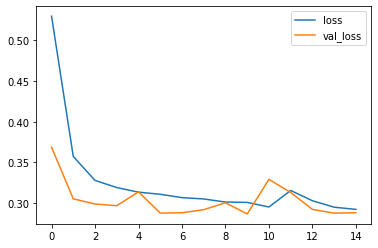

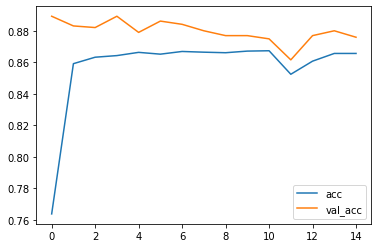

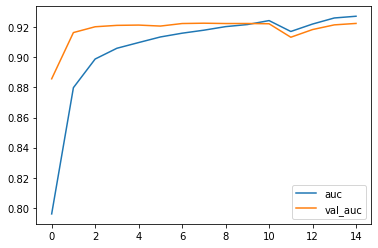

1083/1083 [==============================] - 1s 535us/sample - loss: 0.3146 - tp: 299.0000 - fp: 12.0000 - tn: 645.0000 - fn: 127.0000 - accuracy: 0.8717 - precision: 0.9614 - recall: 0.7019 - auc: 0.9059
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 1ms/sample - loss: 0.5586 - tp: 1245.0000 - fp: 3.0000 - tn: 5323.0000 - fn: 2202.0000 - accuracy: 0.7487 - precision: 0.9976 - recall: 0.3612 - auc: 0.7870 - val_loss: 0.4118 - val_tp: 276.0000 - val_fp: 2.0000 - val_tn: 586.0000 - val_fn: 111.0000 - val_accuracy: 0.8841 - val_precision: 0.9928 - val_recall: 0.7132 - val_auc: 0.8649
Epoch 2/1000
8773/8773 [==============================] - 9s 1ms/sample - loss: 0.3728 - tp: 2266.0000 - fp: 25.0000 - tn: 5301.0000 - fn: 1181.0000 - accuracy: 0.8625 - precision: 0.9891 - recall: 0.6574 - auc: 0.8535 - val_loss: 0.3152 - val_tp: 270.0000 - val_fp: 0.0000e+00 - val_tn: 588.0000 - val_fn: 117.0000 - val_accuracy: 

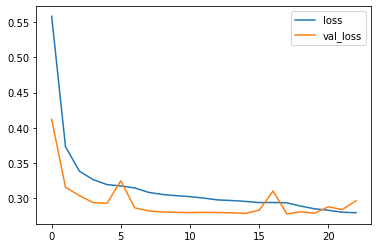

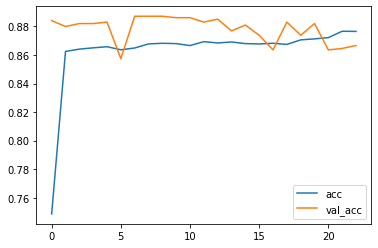

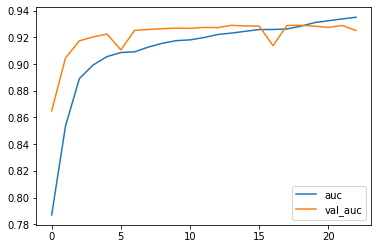

1083/1083 [==============================] - 1s 542us/sample - loss: 0.3213 - tp: 279.0000 - fp: 11.0000 - tn: 646.0000 - fn: 147.0000 - accuracy: 0.8541 - precision: 0.9621 - recall: 0.6549 - auc: 0.9081


In [165]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.0001

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state = 7)
cvscores_1 = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
    #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
# early stop model fitting when validation loss does not decrease in 5 steps
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)
#  mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
#class_weights = class_weight.compute_class_weight('balanced', np.unique(relevance_train.values), relevance_train.values)
#class_weight_dict = dict(enumerate(class_weights))

# fit model
  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc],
    #class_weight = class_weight_dict
    #use_multiprocessing=True
  )

#saved_model = tf.keras.models.load_model('best_model.h5')
#saved_model.summary()

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

#saved_model.evaluate(x = test_c, y = relevance_test.values)
  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_1 = cvscores_1.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [163]:
cvscores_1

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,297.0,10.0,648.0,129.0,0.871771,0.967427,0.697183,0.918124
1,268.0,3.0,654.0,158.0,0.851339,0.988930,0.629108,0.903851
2,307.0,33.0,624.0,119.0,0.859649,0.902941,0.720657,0.912606
3,290.0,21.0,636.0,136.0,0.855032,0.932476,0.680751,0.890911
4,331.0,70.0,587.0,95.0,0.847645,0.825436,0.776995,0.916579
5,298.0,16.0,641.0,128.0,0.867036,0.949045,0.699531,0.908286
6,293.0,11.0,646.0,133.0,0.867036,0.963816,0.687793,0.904753
7,279.0,1.0,656.0,147.0,0.863343,0.996429,0.654930,0.922884
8,293.0,5.0,652.0,133.0,0.872576,0.983221,0.687793,0.911924
9,334.0,69.0,588.0,92.0,0.851339,0.828784,0.784038,0.915638


In [164]:
cvscores_1.mean()

tp           299.000000
fp            23.900000
tn           633.200000
fn           127.000000
accuracy       0.860677
precision      0.933850
recall         0.701878
auc            0.910556
dtype: float64

##### Bi-LSTM + 1D CNN

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 14s 2ms/sample - loss: 0.5322 - tp: 1782.0000 - fp: 258.0000 - tn: 5072.0000 - fn: 1660.0000 - accuracy: 0.7813 - precision: 0.8735 - recall: 0.5177 - auc: 0.8085 - val_loss: 0.3858 - val_tp: 255.0000 - val_fp: 4.0000 - val_tn: 579.0000 - val_fn: 137.0000 - val_accuracy: 0.8554 - val_precision: 0.9846 - val_recall: 0.6505 - val_auc: 0.8354
Epoch 2/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.3508 - tp: 2307.0000 - fp: 28.0000 - tn: 5302.0000 - fn: 1135.0000 - accuracy: 0.8674 - precision: 0.9880 - recall: 0.6702 - auc: 0.8536 - val_loss: 0.3643 - val_tp: 254.0000 - val_fp: 1.0000 - val_tn: 582.0000 - val_fn: 138.0000 - val_accuracy: 0.8574 - val_precision: 0.9961 - val_recall: 0.6480 - val_auc: 0.8545
Epoch 3/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.3274 - tp: 2312.0000 - fp: 

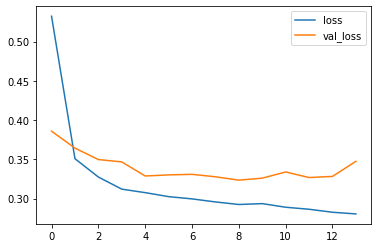

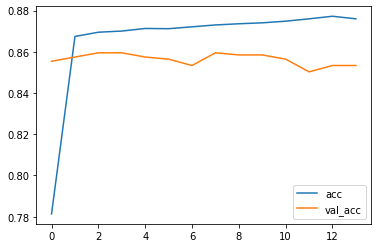

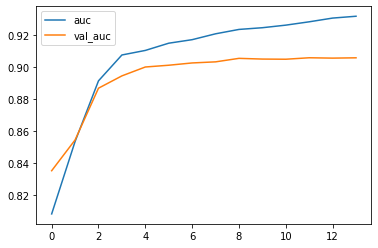

1084/1084 [==============================] - 1s 571us/sample - loss: 0.3138 - tp: 278.0000 - fp: 5.0000 - tn: 653.0000 - fn: 148.0000 - accuracy: 0.8589 - precision: 0.9823 - recall: 0.6526 - auc: 0.9143
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.5154 - tp: 1469.0000 - fp: 25.0000 - tn: 5300.0000 - fn: 1979.0000 - accuracy: 0.7716 - precision: 0.9833 - recall: 0.4260 - auc: 0.8180 - val_loss: 0.4055 - val_tp: 250.0000 - val_fp: 15.0000 - val_tn: 574.0000 - val_fn: 136.0000 - val_accuracy: 0.8451 - val_precision: 0.9434 - val_recall: 0.6477 - val_auc: 0.8683
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3619 - tp: 2358.0000 - fp: 125.0000 - tn: 5200.0000 - fn: 1090.0000 - accuracy: 0.8615 - precision: 0.9497 - recall: 0.6839 - auc: 0.8871 - val_loss: 0.3542 - val_tp: 256.0000 - val_fp: 19.0000 - val_tn: 570.0000 - val_fn: 130.0000 - val_accuracy: 

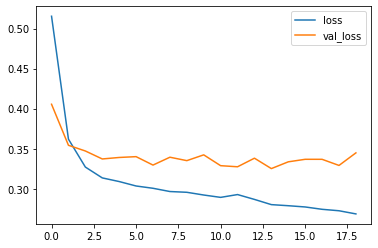

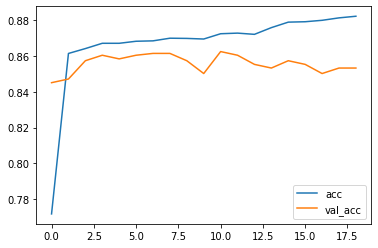

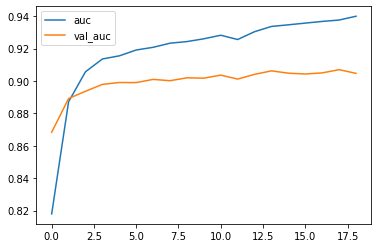

1083/1083 [==============================] - 1s 612us/sample - loss: 0.2979 - tp: 314.0000 - fp: 23.0000 - tn: 634.0000 - fn: 112.0000 - accuracy: 0.8753 - precision: 0.9318 - recall: 0.7371 - auc: 0.9199
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.4982 - tp: 1583.0000 - fp: 7.0000 - tn: 5311.0000 - fn: 1872.0000 - accuracy: 0.7858 - precision: 0.9956 - recall: 0.4582 - auc: 0.8235 - val_loss: 0.3597 - val_tp: 244.0000 - val_fp: 3.0000 - val_tn: 593.0000 - val_fn: 135.0000 - val_accuracy: 0.8585 - val_precision: 0.9879 - val_recall: 0.6438 - val_auc: 0.8690
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3264 - tp: 2311.0000 - fp: 11.0000 - tn: 5307.0000 - fn: 1144.0000 - accuracy: 0.8683 - precision: 0.9953 - recall: 0.6689 - auc: 0.8948 - val_loss: 0.3319 - val_tp: 244.0000 - val_fp: 2.0000 - val_tn: 594.0000 - val_fn: 135.0000 - val_accuracy: 0.8

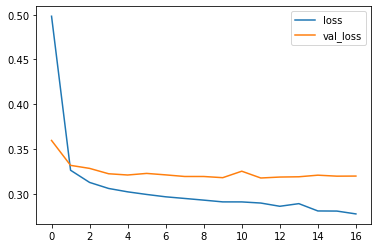

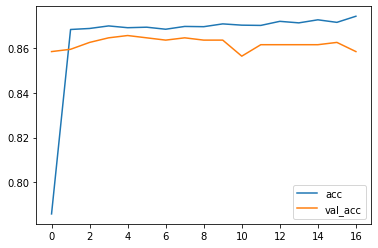

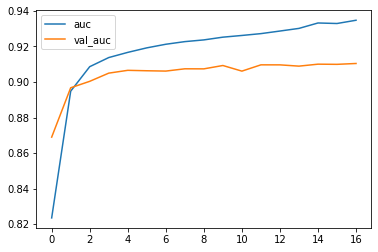

1083/1083 [==============================] - 1s 570us/sample - loss: 0.3440 - tp: 285.0000 - fp: 25.0000 - tn: 632.0000 - fn: 141.0000 - accuracy: 0.8467 - precision: 0.9194 - recall: 0.6690 - auc: 0.8953
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.4962 - tp: 1670.0000 - fp: 22.0000 - tn: 5301.0000 - fn: 1780.0000 - accuracy: 0.7946 - precision: 0.9870 - recall: 0.4841 - auc: 0.8139 - val_loss: 0.3865 - val_tp: 246.0000 - val_fp: 12.0000 - val_tn: 579.0000 - val_fn: 138.0000 - val_accuracy: 0.8462 - val_precision: 0.9535 - val_recall: 0.6406 - val_auc: 0.8431
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3476 - tp: 2318.0000 - fp: 54.0000 - tn: 5269.0000 - fn: 1132.0000 - accuracy: 0.8648 - precision: 0.9772 - recall: 0.6719 - auc: 0.8773 - val_loss: 0.3517 - val_tp: 246.0000 - val_fp: 2.0000 - val_tn: 589.0000 - val_fn: 138.0000 - val_accuracy: 0

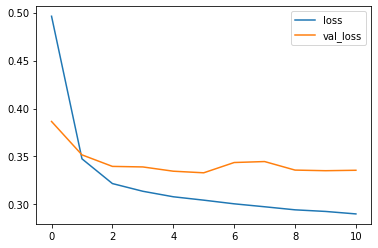

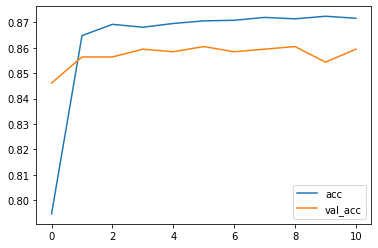

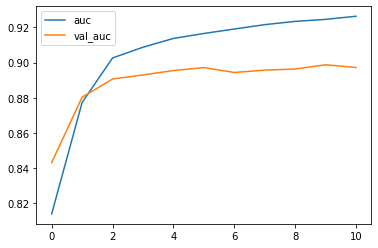

1083/1083 [==============================] - 1s 562us/sample - loss: 0.2942 - tp: 289.0000 - fp: 5.0000 - tn: 652.0000 - fn: 137.0000 - accuracy: 0.8689 - precision: 0.9830 - recall: 0.6784 - auc: 0.9231
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 15s 2ms/sample - loss: 0.5093 - tp: 1443.0000 - fp: 33.0000 - tn: 5294.0000 - fn: 2003.0000 - accuracy: 0.7679 - precision: 0.9776 - recall: 0.4187 - auc: 0.8264 - val_loss: 0.3991 - val_tp: 256.0000 - val_fp: 13.0000 - val_tn: 574.0000 - val_fn: 132.0000 - val_accuracy: 0.8513 - val_precision: 0.9517 - val_recall: 0.6598 - val_auc: 0.8679
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3570 - tp: 2407.0000 - fp: 202.0000 - tn: 5125.0000 - fn: 1039.0000 - accuracy: 0.8585 - precision: 0.9226 - recall: 0.6985 - auc: 0.8883 - val_loss: 0.3634 - val_tp: 257.0000 - val_fp: 12.0000 - val_tn: 575.0000 - val_fn: 131.0000 - val_accuracy: 

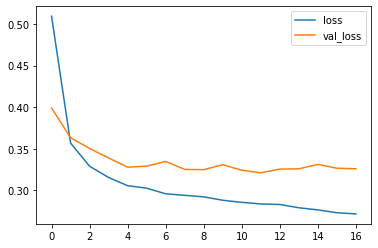

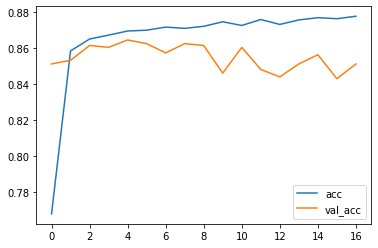

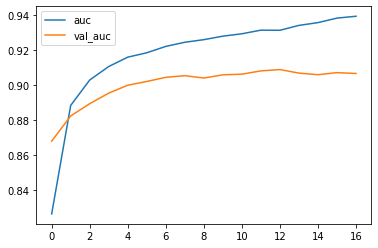

1083/1083 [==============================] - 1s 576us/sample - loss: 0.3162 - tp: 291.0000 - fp: 16.0000 - tn: 641.0000 - fn: 135.0000 - accuracy: 0.8606 - precision: 0.9479 - recall: 0.6831 - auc: 0.9090
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.5070 - tp: 1540.0000 - fp: 8.0000 - tn: 5320.0000 - fn: 1905.0000 - accuracy: 0.7819 - precision: 0.9948 - recall: 0.4470 - auc: 0.8140 - val_loss: 0.3807 - val_tp: 254.0000 - val_fp: 6.0000 - val_tn: 580.0000 - val_fn: 135.0000 - val_accuracy: 0.8554 - val_precision: 0.9769 - val_recall: 0.6530 - val_auc: 0.8576
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3308 - tp: 2315.0000 - fp: 46.0000 - tn: 5282.0000 - fn: 1130.0000 - accuracy: 0.8660 - precision: 0.9805 - recall: 0.6720 - auc: 0.8926 - val_loss: 0.3391 - val_tp: 261.0000 - val_fp: 11.0000 - val_tn: 575.0000 - val_fn: 128.0000 - val_accuracy: 0.

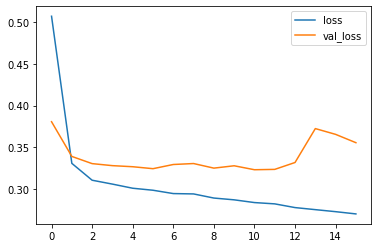

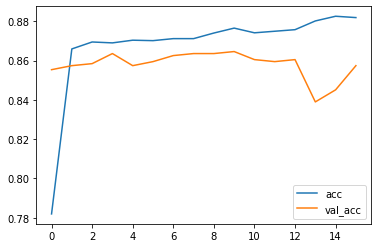

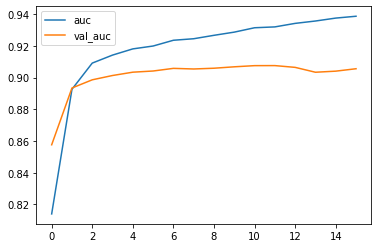

1083/1083 [==============================] - 1s 566us/sample - loss: 0.3155 - tp: 288.0000 - fp: 14.0000 - tn: 643.0000 - fn: 138.0000 - accuracy: 0.8596 - precision: 0.9536 - recall: 0.6761 - auc: 0.9091
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5212 - tp: 1473.0000 - fp: 15.0000 - tn: 5310.0000 - fn: 1975.0000 - accuracy: 0.7732 - precision: 0.9899 - recall: 0.4272 - auc: 0.8177 - val_loss: 0.4012 - val_tp: 252.0000 - val_fp: 5.0000 - val_tn: 584.0000 - val_fn: 134.0000 - val_accuracy: 0.8574 - val_precision: 0.9805 - val_recall: 0.6528 - val_auc: 0.8628
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3466 - tp: 2295.0000 - fp: 32.0000 - tn: 5293.0000 - fn: 1153.0000 - accuracy: 0.8649 - precision: 0.9862 - recall: 0.6656 - auc: 0.8903 - val_loss: 0.3472 - val_tp: 255.0000 - val_fp: 4.0000 - val_tn: 585.0000 - val_fn: 131.0000 - val_accuracy: 0.

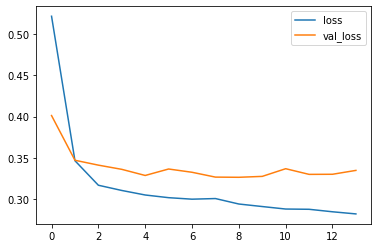

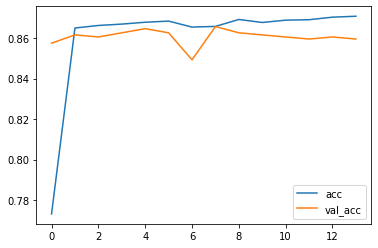

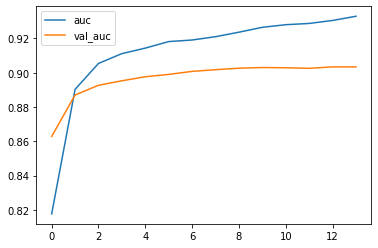

1083/1083 [==============================] - 1s 583us/sample - loss: 0.2917 - tp: 302.0000 - fp: 15.0000 - tn: 642.0000 - fn: 124.0000 - accuracy: 0.8717 - precision: 0.9527 - recall: 0.7089 - auc: 0.9224
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5122 - tp: 1397.0000 - fp: 29.0000 - tn: 5300.0000 - fn: 2047.0000 - accuracy: 0.7634 - precision: 0.9797 - recall: 0.4056 - auc: 0.8207 - val_loss: 0.4026 - val_tp: 251.0000 - val_fp: 10.0000 - val_tn: 575.0000 - val_fn: 139.0000 - val_accuracy: 0.8472 - val_precision: 0.9617 - val_recall: 0.6436 - val_auc: 0.8610
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3390 - tp: 2336.0000 - fp: 69.0000 - tn: 5260.0000 - fn: 1108.0000 - accuracy: 0.8658 - precision: 0.9713 - recall: 0.6783 - auc: 0.8870 - val_loss: 0.3481 - val_tp: 257.0000 - val_fp: 8.0000 - val_tn: 577.0000 - val_fn: 133.0000 - val_accuracy: 0

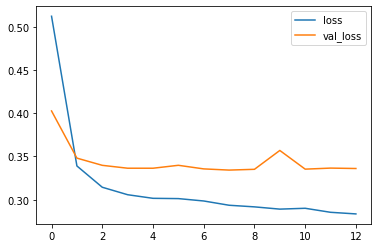

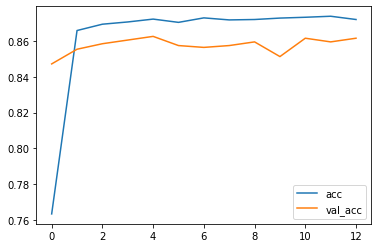

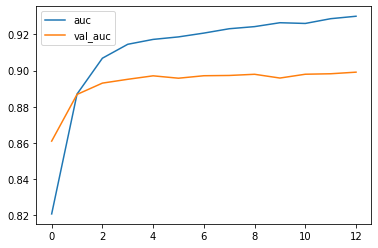

1083/1083 [==============================] - 1s 566us/sample - loss: 0.3141 - tp: 285.0000 - fp: 7.0000 - tn: 650.0000 - fn: 141.0000 - accuracy: 0.8633 - precision: 0.9760 - recall: 0.6690 - auc: 0.9121
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.5067 - tp: 1580.0000 - fp: 24.0000 - tn: 5289.0000 - fn: 1880.0000 - accuracy: 0.7830 - precision: 0.9850 - recall: 0.4566 - auc: 0.8085 - val_loss: 0.3766 - val_tp: 244.0000 - val_fp: 8.0000 - val_tn: 593.0000 - val_fn: 130.0000 - val_accuracy: 0.8585 - val_precision: 0.9683 - val_recall: 0.6524 - val_auc: 0.8647
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3415 - tp: 2311.0000 - fp: 24.0000 - tn: 5289.0000 - fn: 1149.0000 - accuracy: 0.8663 - precision: 0.9897 - recall: 0.6679 - auc: 0.8881 - val_loss: 0.3298 - val_tp: 247.0000 - val_fp: 0.0000e+00 - val_tn: 601.0000 - val_fn: 127.0000 - val_accuracy:

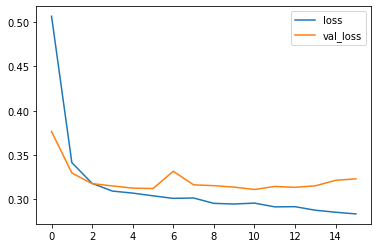

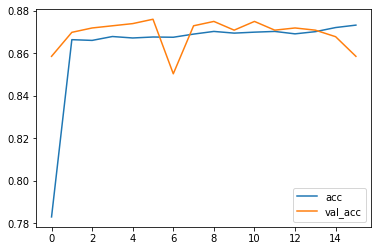

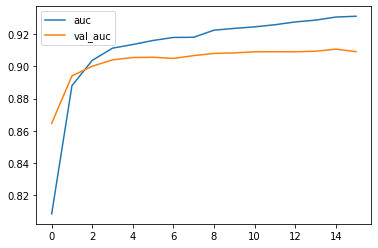

1083/1083 [==============================] - 1s 573us/sample - loss: 0.3008 - tp: 291.0000 - fp: 9.0000 - tn: 648.0000 - fn: 135.0000 - accuracy: 0.8670 - precision: 0.9700 - recall: 0.6831 - auc: 0.9208
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 15s 2ms/sample - loss: 0.4957 - tp: 1715.0000 - fp: 91.0000 - tn: 5238.0000 - fn: 1729.0000 - accuracy: 0.7925 - precision: 0.9496 - recall: 0.4980 - auc: 0.8167 - val_loss: 0.3786 - val_tp: 255.0000 - val_fp: 12.0000 - val_tn: 573.0000 - val_fn: 135.0000 - val_accuracy: 0.8492 - val_precision: 0.9551 - val_recall: 0.6538 - val_auc: 0.8653
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3528 - tp: 2376.0000 - fp: 164.0000 - tn: 5165.0000 - fn: 1068.0000 - accuracy: 0.8596 - precision: 0.9354 - recall: 0.6899 - auc: 0.8795 - val_loss: 0.3528 - val_tp: 264.0000 - val_fp: 23.0000 - val_tn: 562.0000 - val_fn: 126.0000 - val_accuracy: 

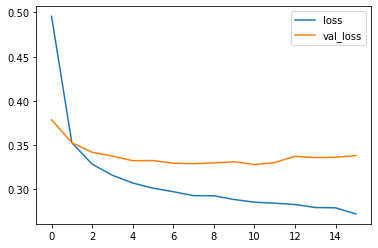

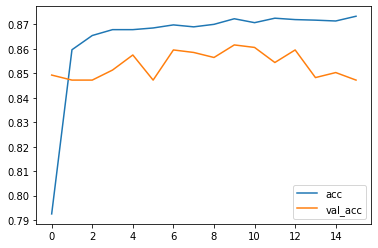

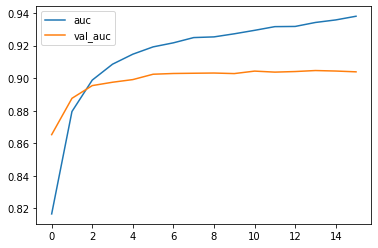

1083/1083 [==============================] - 1s 571us/sample - loss: 0.3058 - tp: 303.0000 - fp: 10.0000 - tn: 647.0000 - fn: 123.0000 - accuracy: 0.8772 - precision: 0.9681 - recall: 0.7113 - auc: 0.9135


In [73]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.0001
N_SPLITS = 10

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_2 = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

for train, test in kfold.split(texts, labels):

  model = tf.keras.Sequential([
    #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       tf.keras.layers.Conv1D(filters = 32, kernel_size = 5, padding='valid', activation='relu', strides=1),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(32, activation='relu'),
       tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
# early stop model fitting when validation loss does not decrease in 5 steps
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# fit model
  from sklearn.utils import class_weight

  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
  )

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_2 = cvscores_2.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [74]:
cvscores_2

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,278.0,5.0,653.0,148.0,0.858856,0.982332,0.652582,0.914348
1,314.0,23.0,634.0,112.0,0.875346,0.931751,0.737089,0.919925
2,285.0,25.0,632.0,141.0,0.846722,0.919355,0.669014,0.895256
3,289.0,5.0,652.0,137.0,0.868883,0.982993,0.678404,0.923132
4,291.0,16.0,641.0,135.0,0.860572,0.947883,0.683099,0.909037
5,288.0,14.0,643.0,138.0,0.859649,0.953642,0.676056,0.909106
6,302.0,15.0,642.0,124.0,0.871653,0.952681,0.708920,0.922398
7,285.0,7.0,650.0,141.0,0.863343,0.976027,0.669014,0.912054
8,291.0,9.0,648.0,135.0,0.867036,0.970000,0.683099,0.920792
9,303.0,10.0,647.0,123.0,0.877193,0.968051,0.711268,0.913512


In [75]:
cvscores_2.mean()

tp           292.600000
fp            12.900000
tn           644.200000
fn           133.400000
accuracy       0.864925
precision      0.958472
recall         0.686854
auc            0.913956
dtype: float64

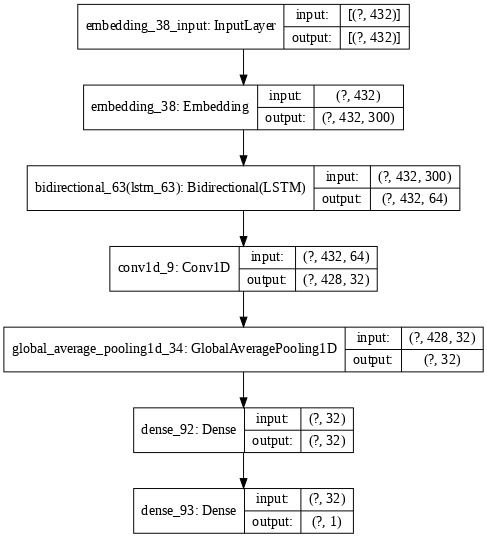

In [76]:
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True, dpi = 70)

##### Bi-LSTM + Attention Layer

In [0]:
# assign importance weights to each word
class attention(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

Building Bi-LSTM model...
Training model...
Train on 8772 samples, validate on 975 samples
Epoch 1/1000
8772/8772 [==============================] - 14s 2ms/sample - loss: 0.3654 - tp: 2155.0000 - fp: 42.0000 - tn: 5288.0000 - fn: 1287.0000 - accuracy: 0.8485 - precision: 0.9809 - recall: 0.6261 - auc: 0.8793 - val_loss: 0.3306 - val_tp: 255.0000 - val_fp: 1.0000 - val_tn: 582.0000 - val_fn: 137.0000 - val_accuracy: 0.8585 - val_precision: 0.9961 - val_recall: 0.6505 - val_auc: 0.8995
Epoch 2/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.3076 - tp: 2343.0000 - fp: 45.0000 - tn: 5285.0000 - fn: 1099.0000 - accuracy: 0.8696 - precision: 0.9812 - recall: 0.6807 - auc: 0.9125 - val_loss: 0.3267 - val_tp: 255.0000 - val_fp: 0.0000e+00 - val_tn: 583.0000 - val_fn: 137.0000 - val_accuracy: 0.8595 - val_precision: 1.0000 - val_recall: 0.6505 - val_auc: 0.9050
Epoch 3/1000
8772/8772 [==============================] - 10s 1ms/sample - loss: 0.2975 - tp: 2361.0000 - f

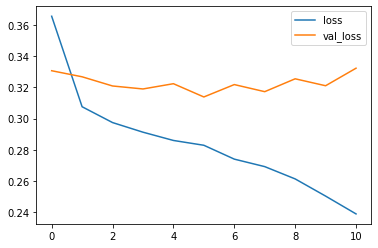

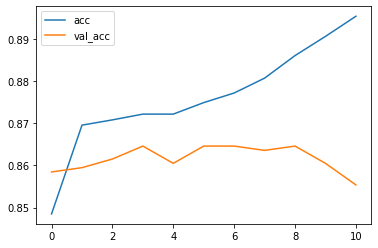

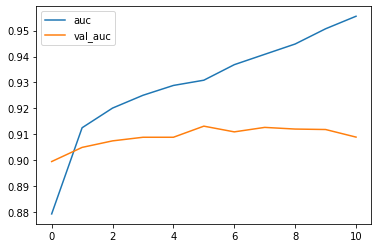

1084/1084 [==============================] - 1s 566us/sample - loss: 0.3090 - tp: 290.0000 - fp: 19.0000 - tn: 639.0000 - fn: 136.0000 - accuracy: 0.8570 - precision: 0.9385 - recall: 0.6808 - auc: 0.9175
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.3655 - tp: 2131.0000 - fp: 20.0000 - tn: 5305.0000 - fn: 1317.0000 - accuracy: 0.8476 - precision: 0.9907 - recall: 0.6180 - auc: 0.8772 - val_loss: 0.3390 - val_tp: 247.0000 - val_fp: 0.0000e+00 - val_tn: 589.0000 - val_fn: 139.0000 - val_accuracy: 0.8574 - val_precision: 1.0000 - val_recall: 0.6399 - val_auc: 0.8982
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3083 - tp: 2317.0000 - fp: 36.0000 - tn: 5289.0000 - fn: 1131.0000 - accuracy: 0.8670 - precision: 0.9847 - recall: 0.6720 - auc: 0.9130 - val_loss: 0.3278 - val_tp: 256.0000 - val_fp: 12.0000 - val_tn: 577.0000 - val_fn: 130.0000 - val_accurac

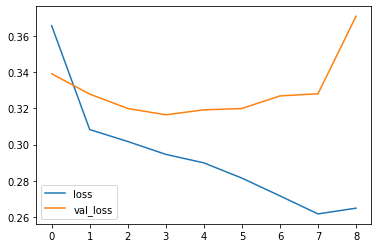

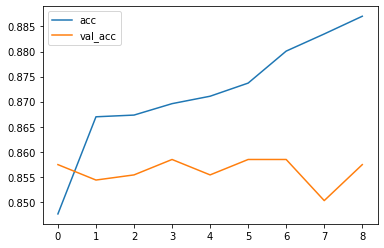

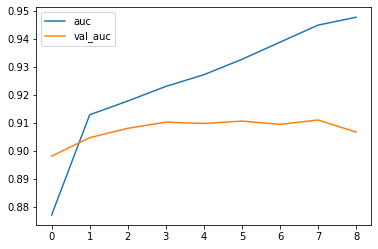

1083/1083 [==============================] - 1s 569us/sample - loss: 0.2856 - tp: 306.0000 - fp: 9.0000 - tn: 648.0000 - fn: 120.0000 - accuracy: 0.8809 - precision: 0.9714 - recall: 0.7183 - auc: 0.9252
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.3538 - tp: 2174.0000 - fp: 91.0000 - tn: 5227.0000 - fn: 1281.0000 - accuracy: 0.8436 - precision: 0.9598 - recall: 0.6292 - auc: 0.8884 - val_loss: 0.3236 - val_tp: 245.0000 - val_fp: 0.0000e+00 - val_tn: 596.0000 - val_fn: 134.0000 - val_accuracy: 0.8626 - val_precision: 1.0000 - val_recall: 0.6464 - val_auc: 0.9035
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3031 - tp: 2343.0000 - fp: 29.0000 - tn: 5289.0000 - fn: 1112.0000 - accuracy: 0.8699 - precision: 0.9878 - recall: 0.6781 - auc: 0.9169 - val_loss: 0.3176 - val_tp: 258.0000 - val_fp: 17.0000 - val_tn: 579.0000 - val_fn: 121.0000 - val_accuracy

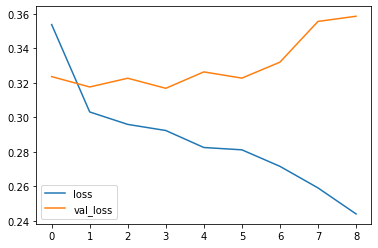

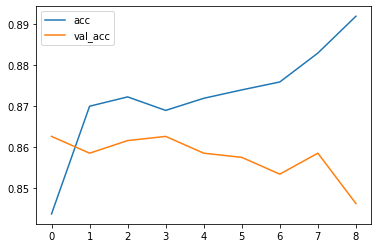

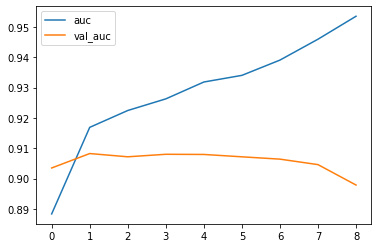

1083/1083 [==============================] - 1s 572us/sample - loss: 0.3285 - tp: 287.0000 - fp: 16.0000 - tn: 641.0000 - fn: 139.0000 - accuracy: 0.8569 - precision: 0.9472 - recall: 0.6737 - auc: 0.9002
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.3736 - tp: 2100.0000 - fp: 68.0000 - tn: 5255.0000 - fn: 1350.0000 - accuracy: 0.8384 - precision: 0.9686 - recall: 0.6087 - auc: 0.8784 - val_loss: 0.3356 - val_tp: 248.0000 - val_fp: 0.0000e+00 - val_tn: 591.0000 - val_fn: 136.0000 - val_accuracy: 0.8605 - val_precision: 1.0000 - val_recall: 0.6458 - val_auc: 0.8945
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3088 - tp: 2342.0000 - fp: 40.0000 - tn: 5283.0000 - fn: 1108.0000 - accuracy: 0.8691 - precision: 0.9832 - recall: 0.6788 - auc: 0.9119 - val_loss: 0.3329 - val_tp: 246.0000 - val_fp: 0.0000e+00 - val_tn: 591.0000 - val_fn: 138.0000 - val_accu

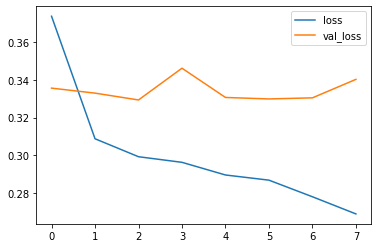

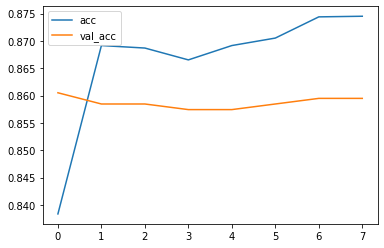

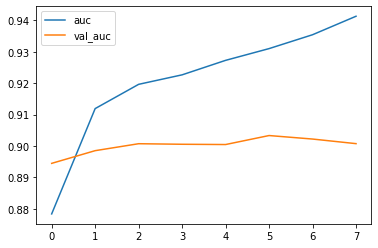

1083/1083 [==============================] - 1s 563us/sample - loss: 0.2929 - tp: 299.0000 - fp: 11.0000 - tn: 646.0000 - fn: 127.0000 - accuracy: 0.8726 - precision: 0.9645 - recall: 0.7019 - auc: 0.9270
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 15s 2ms/sample - loss: 0.3684 - tp: 2130.0000 - fp: 70.0000 - tn: 5257.0000 - fn: 1316.0000 - accuracy: 0.8420 - precision: 0.9682 - recall: 0.6181 - auc: 0.8777 - val_loss: 0.3363 - val_tp: 252.0000 - val_fp: 0.0000e+00 - val_tn: 587.0000 - val_fn: 136.0000 - val_accuracy: 0.8605 - val_precision: 1.0000 - val_recall: 0.6495 - val_auc: 0.8903
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3068 - tp: 2306.0000 - fp: 7.0000 - tn: 5320.0000 - fn: 1140.0000 - accuracy: 0.8693 - precision: 0.9970 - recall: 0.6692 - auc: 0.9129 - val_loss: 0.3305 - val_tp: 252.0000 - val_fp: 0.0000e+00 - val_tn: 587.0000 - val_fn: 136.0000 - val_accur

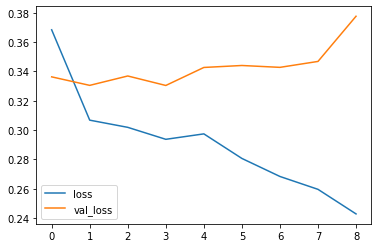

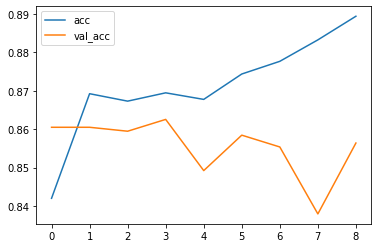

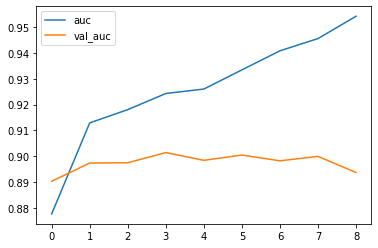

1083/1083 [==============================] - 1s 562us/sample - loss: 0.3098 - tp: 283.0000 - fp: 3.0000 - tn: 654.0000 - fn: 143.0000 - accuracy: 0.8652 - precision: 0.9895 - recall: 0.6643 - auc: 0.9201
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.3737 - tp: 2155.0000 - fp: 70.0000 - tn: 5258.0000 - fn: 1290.0000 - accuracy: 0.8450 - precision: 0.9685 - recall: 0.6255 - auc: 0.8757 - val_loss: 0.3302 - val_tp: 255.0000 - val_fp: 0.0000e+00 - val_tn: 586.0000 - val_fn: 134.0000 - val_accuracy: 0.8626 - val_precision: 1.0000 - val_recall: 0.6555 - val_auc: 0.8990
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3049 - tp: 2334.0000 - fp: 32.0000 - tn: 5296.0000 - fn: 1111.0000 - accuracy: 0.8697 - precision: 0.9865 - recall: 0.6775 - auc: 0.9147 - val_loss: 0.3195 - val_tp: 261.0000 - val_fp: 3.0000 - val_tn: 583.0000 - val_fn: 128.0000 - val_accuracy:

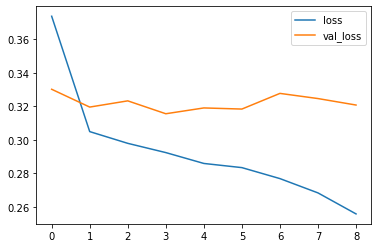

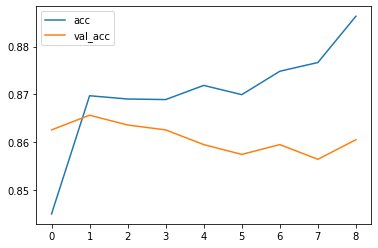

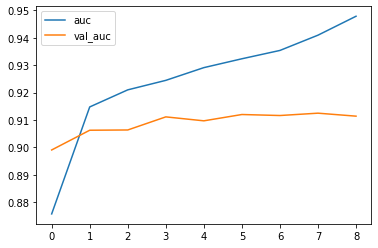

1083/1083 [==============================] - 1s 575us/sample - loss: 0.3106 - tp: 284.0000 - fp: 8.0000 - tn: 649.0000 - fn: 142.0000 - accuracy: 0.8615 - precision: 0.9726 - recall: 0.6667 - auc: 0.9127
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.3720 - tp: 2131.0000 - fp: 62.0000 - tn: 5263.0000 - fn: 1317.0000 - accuracy: 0.8428 - precision: 0.9717 - recall: 0.6180 - auc: 0.8773 - val_loss: 0.3293 - val_tp: 253.0000 - val_fp: 0.0000e+00 - val_tn: 589.0000 - val_fn: 133.0000 - val_accuracy: 0.8636 - val_precision: 1.0000 - val_recall: 0.6554 - val_auc: 0.8972
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3097 - tp: 2302.0000 - fp: 30.0000 - tn: 5295.0000 - fn: 1146.0000 - accuracy: 0.8660 - precision: 0.9871 - recall: 0.6676 - auc: 0.9116 - val_loss: 0.3251 - val_tp: 254.0000 - val_fp: 1.0000 - val_tn: 588.0000 - val_fn: 132.0000 - val_accuracy:

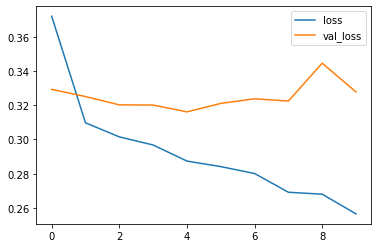

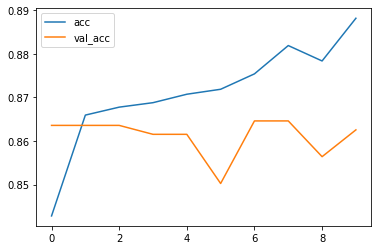

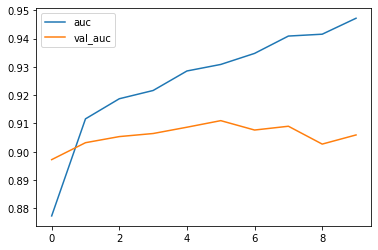

1083/1083 [==============================] - 1s 593us/sample - loss: 0.2936 - tp: 296.0000 - fp: 13.0000 - tn: 644.0000 - fn: 130.0000 - accuracy: 0.8680 - precision: 0.9579 - recall: 0.6948 - auc: 0.9213
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.3755 - tp: 2183.0000 - fp: 105.0000 - tn: 5224.0000 - fn: 1261.0000 - accuracy: 0.8443 - precision: 0.9541 - recall: 0.6339 - auc: 0.8734 - val_loss: 0.3545 - val_tp: 251.0000 - val_fp: 5.0000 - val_tn: 580.0000 - val_fn: 139.0000 - val_accuracy: 0.8523 - val_precision: 0.9805 - val_recall: 0.6436 - val_auc: 0.8896
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3087 - tp: 2385.0000 - fp: 79.0000 - tn: 5250.0000 - fn: 1059.0000 - accuracy: 0.8703 - precision: 0.9679 - recall: 0.6925 - auc: 0.9125 - val_loss: 0.3338 - val_tp: 256.0000 - val_fp: 9.0000 - val_tn: 576.0000 - val_fn: 134.0000 - val_accuracy: 0

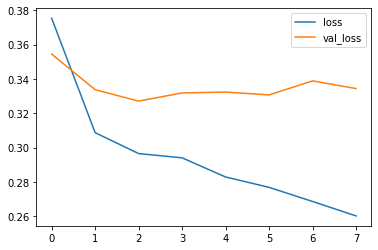

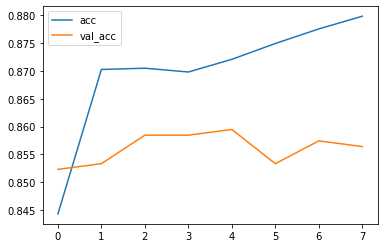

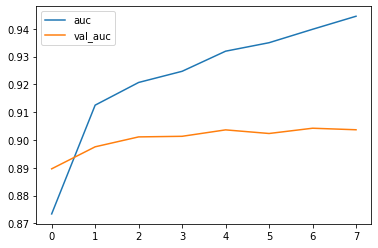

1083/1083 [==============================] - 1s 558us/sample - loss: 0.3093 - tp: 277.0000 - fp: 2.0000 - tn: 655.0000 - fn: 149.0000 - accuracy: 0.8606 - precision: 0.9928 - recall: 0.6502 - auc: 0.9173
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 13s 2ms/sample - loss: 0.3745 - tp: 2089.0000 - fp: 47.0000 - tn: 5266.0000 - fn: 1371.0000 - accuracy: 0.8384 - precision: 0.9780 - recall: 0.6038 - auc: 0.8788 - val_loss: 0.3217 - val_tp: 244.0000 - val_fp: 0.0000e+00 - val_tn: 601.0000 - val_fn: 130.0000 - val_accuracy: 0.8667 - val_precision: 1.0000 - val_recall: 0.6524 - val_auc: 0.9040
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3085 - tp: 2333.0000 - fp: 40.0000 - tn: 5273.0000 - fn: 1127.0000 - accuracy: 0.8670 - precision: 0.9831 - recall: 0.6743 - auc: 0.9139 - val_loss: 0.3130 - val_tp: 248.0000 - val_fp: 1.0000 - val_tn: 600.0000 - val_fn: 126.0000 - val_accuracy:

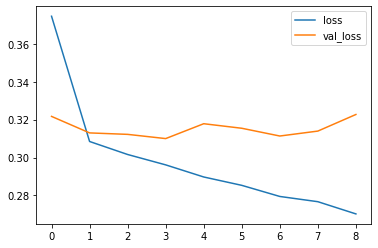

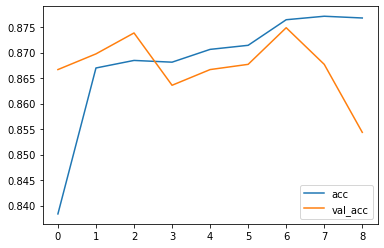

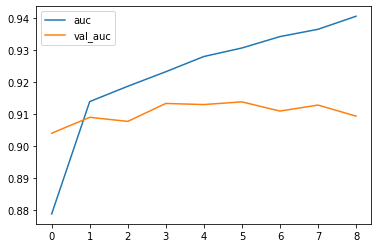

1083/1083 [==============================] - 1s 563us/sample - loss: 0.2985 - tp: 310.0000 - fp: 28.0000 - tn: 629.0000 - fn: 116.0000 - accuracy: 0.8670 - precision: 0.9172 - recall: 0.7277 - auc: 0.9225
Training model...
Train on 8773 samples, validate on 975 samples
Epoch 1/1000
8773/8773 [==============================] - 14s 2ms/sample - loss: 0.3691 - tp: 2161.0000 - fp: 59.0000 - tn: 5270.0000 - fn: 1283.0000 - accuracy: 0.8470 - precision: 0.9734 - recall: 0.6275 - auc: 0.8757 - val_loss: 0.3301 - val_tp: 254.0000 - val_fp: 0.0000e+00 - val_tn: 585.0000 - val_fn: 136.0000 - val_accuracy: 0.8605 - val_precision: 1.0000 - val_recall: 0.6513 - val_auc: 0.8996
Epoch 2/1000
8773/8773 [==============================] - 10s 1ms/sample - loss: 0.3066 - tp: 2313.0000 - fp: 31.0000 - tn: 5298.0000 - fn: 1131.0000 - accuracy: 0.8675 - precision: 0.9868 - recall: 0.6716 - auc: 0.9146 - val_loss: 0.3351 - val_tp: 250.0000 - val_fp: 0.0000e+00 - val_tn: 585.0000 - val_fn: 140.0000 - val_accu

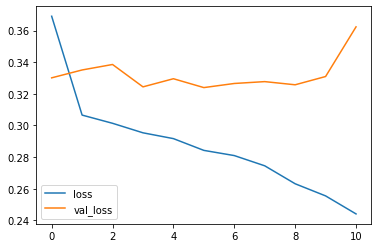

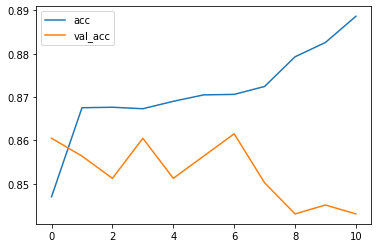

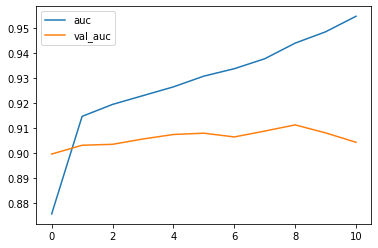

1083/1083 [==============================] - 1s 568us/sample - loss: 0.3077 - tp: 318.0000 - fp: 26.0000 - tn: 631.0000 - fn: 108.0000 - accuracy: 0.8763 - precision: 0.9244 - recall: 0.7465 - auc: 0.9145


In [78]:
# some configuration
VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 32   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 10

print('Building Bi-LSTM model...')
kfold = StratifiedKFold(n_splits=N_SPLITS , shuffle=True, random_state = 7)
cvscores_att = pd.DataFrame(columns = ['tp', 'fp', 'tn', 'fn', 'accuracy','precision', 'recall', 'auc'])
labels = data_cleaned['relevance'].values
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
]

embedding_layer = tf.keras.layers.Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

for train, test in kfold.split(texts, labels):

  input_ = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
  att_out = attention()(x)
  #x = tf.keras.layers.Dense(32, activation='relu')(att_out)
  output = tf.keras.layers.Dense(1, activation='sigmoid')(att_out)
  
  model = tf.keras.models.Model(input_, output)

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )


# Training model:
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

# fit model
  print('Training model...')
  r = model.fit(
    texts[train],
    labels[train],
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
  )

  model.summary()

# plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

# accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

# auc
  plt.plot(r.history['auc'], label='auc')
  plt.plot(r.history['val_auc'], label='val_auc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels[test])
  cvscores_att = cvscores_att.append({'tp': scores[1], 'fp': scores[2], 'tn': scores[3], 'fn': scores[4], 'accuracy': scores[5],'precision': scores[6], 'recall': scores[7], 'auc': scores[8]}, ignore_index=True)

In [79]:
cvscores_att

,tp,fp,tn,fn,accuracy,precision,recall,auc
0,290.0,19.0,639.0,136.0,0.857011,0.938511,0.680751,0.917473
1,306.0,9.0,648.0,120.0,0.880886,0.971429,0.718310,0.925204
2,287.0,16.0,641.0,139.0,0.856879,0.947195,0.673709,0.900215
3,299.0,11.0,646.0,127.0,0.872576,0.964516,0.701878,0.926966
4,283.0,3.0,654.0,143.0,0.865189,0.989510,0.664319,0.920122
5,284.0,8.0,649.0,142.0,0.861496,0.972603,0.666667,0.912715
6,296.0,13.0,644.0,130.0,0.867959,0.957929,0.694836,0.921344
7,277.0,2.0,655.0,149.0,0.860572,0.992832,0.650235,0.917299
8,310.0,28.0,629.0,116.0,0.867036,0.917160,0.727700,0.922505
9,318.0,26.0,631.0,108.0,0.876270,0.924419,0.746479,0.914500


In [80]:
cvscores_att.mean(axis = 0)

tp           295.000000
fp            13.500000
tn           643.600000
fn           131.000000
accuracy       0.866588
precision      0.957610
recall         0.692488
auc            0.917834
dtype: float64

# Sentiment Analysis

## Data Augmentation

In [0]:
data_s = data[['texts','positivity']][data['relevance']==1]

In [0]:
# use the function in Oversampling
def oversample(wordlist, pos): 
  new_words = wordlist
  for i in range(len(wordlist)):
    for random_word in wordlist[wordlist.index[i]]:
      try:
        synonyms = get_synonyms(random_word)
        synonym = random.choice(list(synonyms))
        new_words[new_words.index[i]] = [synonym if word == random_word else word for word in new_words[new_words.index[i]]]
      except:
        pass
    s = ' '.join(new_words[new_words.index[i]])
    new_words[new_words.index[i]] = s
  augmented_sentences = pd.DataFrame(columns=['texts','positivity'])
  augmented_sentences['texts'] = new_words
  augmented_sentences['positivity']  = pos
  return augmented_sentences

In [83]:
sentence = data_s['texts']
pos = data_s['positivity']
word_list = sentence.str.split()

random.seed(55)
data_s = data_s.append(oversample(word_list, pos))
data_s.reset_index()

,index,texts,positivity
0,0,yield cd fall late week new york yield cert...,3.0
1,4,currency trading dollar remain tight range a...,3.0
2,5,stock fall bofa alcoa slide stock decline ...,3.0
3,9,u s dollar fall currency decline soften bo...,4.0
4,12,defend deflation author james b stewartthe...,4.0
...,...,...,...
2835,7964,caparison setoff turn nurture ostentatiousness...,7.0
2836,7965,net evasive descent securitiesindustry taunt g...,3.0
2837,7975,alomon healthy leery eminence saving linton br...,8.0
2838,7978,withchild affright monolithic newly story eruh...,5.0


## Baselines - Naive Bayes and SVM

In [0]:
texts = data_s['texts'].values
labels = data_s['positivity'].values

# Linear SVC Model:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state = 7)
acc_svm = pd.DataFrame(columns = ['accuracy'])

for train, test in kfold.split(texts, labels):
# Train both models on the moviereviews.tsv training set:
  text_clf_lsvc.fit(texts[train], labels[train])
  predictions_svm = text_clf_lsvc.predict(texts[test])
  acc_svm = acc_svm.append({'accuracy': metrics.accuracy_score(labels[test], predictions_svm)},  ignore_index=True)
  

In [85]:
acc_svm

,accuracy
0,0.306338
1,0.297887


In [89]:
acc_svm.mean()

accuracy    0.302113
dtype: float64

## Bi-LSTM

In [0]:
# some configuration

MAX_SEQUENCE_LENGTH = 427   # max sentence length 427 words
EMBEDDING_DIM = 300    # word vector dimension

### Word Embedding Weights

In [91]:
# T: number of obersavatons in dataset

# load in pre-trained word vectors
# size: MAX_VOCAB_SIZE x word vector dimension
MAX_VOCAB_SIZE = 50000     # how many words will be used from dictionary 

print('Loading word vectors...')
word2vec = glove_embeddings

# load dataset
sentences = data_s['texts'].fillna("DUMMY_VALUE").values

# convert the sentences (strings) into integers
# return a list of the index of every word in every sentence
num_words = MAX_VOCAB_SIZE
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(sentences)   # word counts on unique words, see below

# get word -> integer mapping
# word2idx: number of unique words with index (Dictionary of word index)
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))

Loading word vectors...
Found 22263 unique tokens.


In [92]:
# prepare embedding matrix
# use the word and index in word2idx to look for the word vector (numeric)
# embedding_matrix
# size: # of unique words x D
n = 0
uncovered_words = {}
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE,len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        #print(embedding_vector)
        if embedding_vector is not None:
      # words not found in embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector
        else:
            n = n + 1
            uncovered_words[n] = word
print('{}, or {:.2%} of total {} unique words are not covered'.format(n, n/len(word2idx), len(word2idx)))

Filling pre-trained embeddings...
4460, or 20.03% of total 22263 unique words are not covered


### Padding

In [93]:
sequences = tokenizer.texts_to_sequences(data_s['texts'].values)  # list, size T x number of words in each line (each line fluctuates)
texts = pad_sequences(sequences, truncating = 'post', padding = 'post', maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of test data tensor:', texts.shape)

Shape of test data tensor: (2840, 427)


### Model

#### Bi-LSTM

Building Bi-LSTM model...
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 33s 25ms/sample - loss: 0.3509 - accuracy: 0.8722 - auc: 0.6866 - val_loss: 0.3402 - val_accuracy: 0.8750 - val_auc: 0.7210
Epoch 2/1000
1278/1278 [==============================] - 30s 24ms/sample - loss: 0.3391 - accuracy: 0.8750 - auc: 0.7079 - val_loss: 0.3416 - val_accuracy: 0.8750 - val_auc: 0.7025
Epoch 3/1000
1278/1278 [==============================] - 30s 24ms/sample - loss: 0.3361 - accuracy: 0.8750 - auc: 0.7229 - val_loss: 0.3418 - val_accuracy: 0.8750 - val_auc: 0.7098
Epoch 4/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3272 - accuracy: 0.8746 - auc: 0.7572 - val_loss: 0.3530 - val_accuracy: 0.8750 - val_auc: 0.6902
Epoch 00004: early stopping
Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

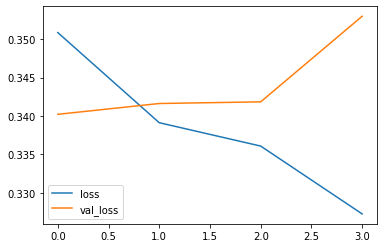

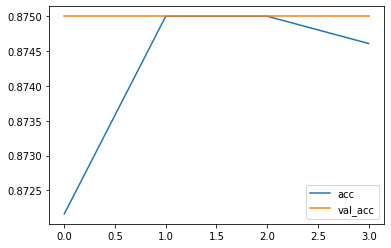

1420/1420 [==============================] - 1s 913us/sample - loss: 0.3408 - accuracy: 0.8750 - auc: 0.7064
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 32s 25ms/sample - loss: 0.3439 - accuracy: 0.8738 - auc: 0.7061 - val_loss: 0.3706 - val_accuracy: 0.8750 - val_auc: 0.6327
Epoch 2/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3325 - accuracy: 0.8750 - auc: 0.7304 - val_loss: 0.3701 - val_accuracy: 0.8750 - val_auc: 0.6104
Epoch 3/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3310 - accuracy: 0.8750 - auc: 0.7349 - val_loss: 0.3720 - val_accuracy: 0.8750 - val_auc: 0.6228
Epoch 4/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3248 - accuracy: 0.8752 - auc: 0.7577 - val_loss: 0.3700 - val_accuracy: 0.8750 - val_auc: 0.6592
Epoch 5/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3199 - accurac

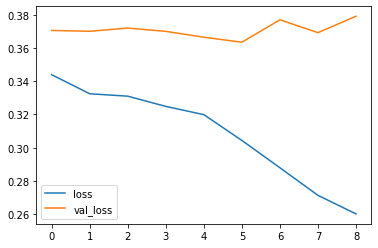

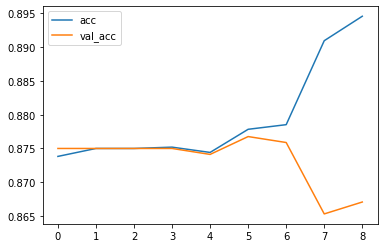

1420/1420 [==============================] - 1s 909us/sample - loss: 0.3345 - accuracy: 0.8750 - auc: 0.7358


In [118]:
# some configuration
oov_tok = "<OOV>"
trunc_type='post'
padding_type='post'

VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 1   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 2

kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_s = pd.DataFrame(columns = ['accuracy', 'auc'])
labels = data_s['positivity'].values

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
]


print('Building Bi-LSTM model...')
for train, test in kfold.split(texts, labels):

  labels_train = pd.get_dummies(labels[train])
  labels_test = pd.get_dummies(labels[test])
  m = sum(labels_train.columns)-sum(labels_test.columns)
  listofzeros = [0] * len(labels_test)
  if m > 0:
    labels_test[m] = listofzeros
  elif m < 0:
    labels_train[-m] = listofzeros

  model = tf.keras.Sequential([
      #Embedding

       tf.keras.layers.Embedding(num_words, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH, weights=[embedding_matrix], trainable=False),
       tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
       #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
       tf.keras.layers.GlobalAveragePooling1D(),
       tf.keras.layers.Dense(8, activation='sigmoid')
  ])

  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )

  # Training model:
  # parameters: batch_size, epoches
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
  #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # fit model
  # load a saved model


  print('Training model...')
  r = model.fit(
  texts[train],
    labels_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    ##class_weight = class_weight_dict
    #use_multiprocessing=True
  )

  #saved_model = tf.keras.models.load_model('best_model.h5')
  #saved_model.summary()
  model.summary()

  # plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

  # accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels_test)
  cvscores_s = cvscores_s.append({'accuracy': scores[1], 'auc': scores[2]}, ignore_index=True)

In [119]:
cvscores_s

,accuracy,auc
0,0.875,0.706370
1,0.875,0.735821


In [120]:
cvscores_s.mean()

accuracy    0.875000
auc         0.721095
dtype: float64

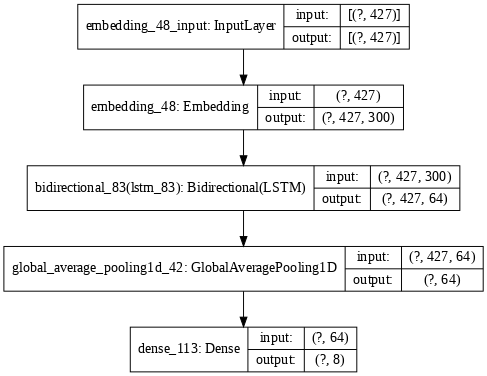

In [113]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True, dpi = 70)

#### Bi-LSTM + Attention

Building Bi-LSTM model...
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 32s 25ms/sample - loss: 0.3505 - accuracy: 0.8738 - auc: 0.6854 - val_loss: 0.3522 - val_accuracy: 0.8750 - val_auc: 0.6990
Epoch 2/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3385 - accuracy: 0.8750 - auc: 0.7138 - val_loss: 0.3494 - val_accuracy: 0.8750 - val_auc: 0.6771
Epoch 3/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3328 - accuracy: 0.8750 - auc: 0.7343 - val_loss: 0.3437 - val_accuracy: 0.8750 - val_auc: 0.6977
Epoch 4/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3186 - accuracy: 0.8747 - auc: 0.7812 - val_loss: 0.3521 - val_accuracy: 0.8750 - val_auc: 0.6942
Epoch 5/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.2980 - accuracy: 0.8772 - auc: 0.8218 - val_loss: 0.3700 - val_accuracy: 0.8732 - val_auc: 0.6691

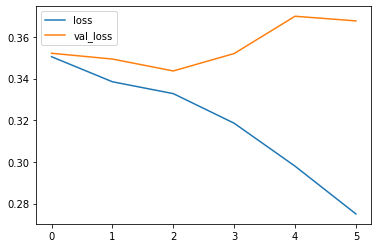

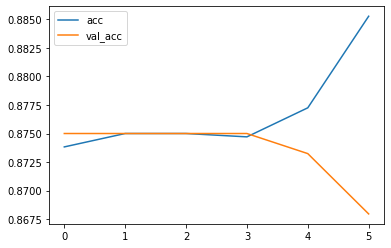

1420/1420 [==============================] - 1s 925us/sample - loss: 0.3350 - accuracy: 0.8750 - auc: 0.7213
Training model...
Train on 1278 samples, validate on 142 samples
Epoch 1/1000
1278/1278 [==============================] - 32s 25ms/sample - loss: 0.3431 - accuracy: 0.8736 - auc: 0.7056 - val_loss: 0.3635 - val_accuracy: 0.8750 - val_auc: 0.6512
Epoch 2/1000
1278/1278 [==============================] - 30s 24ms/sample - loss: 0.3322 - accuracy: 0.8750 - auc: 0.7322 - val_loss: 0.3611 - val_accuracy: 0.8750 - val_auc: 0.6727
Epoch 3/1000
1278/1278 [==============================] - 30s 24ms/sample - loss: 0.3256 - accuracy: 0.8752 - auc: 0.7542 - val_loss: 0.3628 - val_accuracy: 0.8750 - val_auc: 0.6609
Epoch 4/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.3129 - accuracy: 0.8746 - auc: 0.7913 - val_loss: 0.3443 - val_accuracy: 0.8750 - val_auc: 0.7126
Epoch 5/1000
1278/1278 [==============================] - 30s 23ms/sample - loss: 0.2925 - accurac

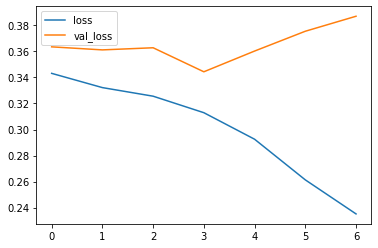

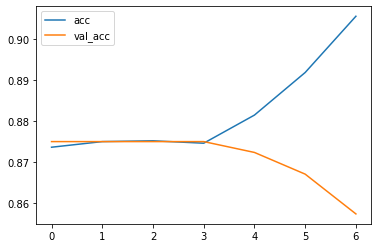

1420/1420 [==============================] - 1s 938us/sample - loss: 0.3339 - accuracy: 0.8756 - auc: 0.7346


In [122]:
class attention(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

# some configuration
oov_tok = "<OOV>"
trunc_type='post'
padding_type='post'

VALIDATION_SPLIT = 0.1   
BATCH_SIZE = 1   # number of training samples to work through
EPOCHS = 1000   # number of complete passes through the training dataset
LEARNING_RATE = 0.001
N_SPLITS = 2

kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state = 7)
cvscores_s = pd.DataFrame(columns = ['accuracy', 'auc'])
labels = data_s['positivity'].values

METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
]

embedding_layer = tf.keras.layers.Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)

print('Building Bi-LSTM model...')
for train, test in kfold.split(texts, labels):

  labels_train = pd.get_dummies(labels[train])
  labels_test = pd.get_dummies(labels[test])
  m = sum(labels_train.columns)-sum(labels_test.columns)
  listofzeros = [0] * len(labels_test)
  if m > 0:
    labels_test[m] = listofzeros
  elif m < 0:
    labels_train[-m] = listofzeros

  input_ = tf.keras.Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))(x)
  att_out = attention()(x)
  output = tf.keras.layers.Dense(8, activation='sigmoid')(att_out)

  model = tf.keras.models.Model(input_, output)


  model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS,
  
  )

  # Training model:
  # parameters: batch_size, epoches
  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3, restore_best_weights=True)
  #mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
  # fit model
  # load a saved model


  print('Training model...')
  r = model.fit(
  texts[train],
    labels_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = VALIDATION_SPLIT,
    callbacks=[es]
    #callbacks=[es, mc]
    ##class_weight = class_weight_dict
    #use_multiprocessing=True
  )

  #saved_model = tf.keras.models.load_model('best_model.h5')
  #saved_model.summary()
  model.summary()

  # plot some data
  plt.plot(r.history['loss'], label='loss')
  plt.plot(r.history['val_loss'], label='val_loss')
  plt.legend()
  plt.show()

  # accuracies
  plt.plot(r.history['accuracy'], label='acc')
  plt.plot(r.history['val_accuracy'], label='val_acc')
  plt.legend()
  plt.show()

  scores = model.evaluate(x = texts[test], y = labels_test)
  cvscores_s = cvscores_s.append({'accuracy': scores[1], 'auc': scores[2]}, ignore_index=True)

In [123]:
cvscores_s

,accuracy,auc
0,0.875000,0.721341
1,0.875616,0.734566


In [124]:
cvscores_s.mean()

accuracy    0.875308
auc         0.727954
dtype: float64

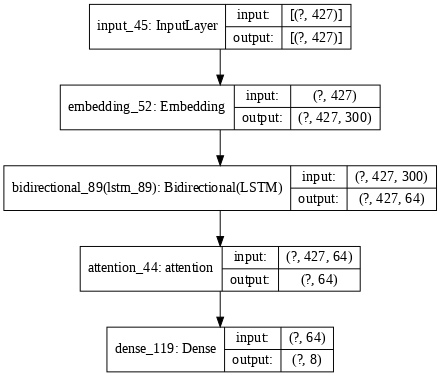

In [125]:
plot_model(model, to_file='model_plot_2.png', show_shapes=True, show_layer_names=True, dpi = 70)